<a href="https://colab.research.google.com/github/ceying/DataSparsityProject_CreditStability/blob/main/HomeCreditStability_PerformanceAnalysis_March2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Setup

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [ ]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Results_df
Concat all pred_proba from all models

In [ ]:
results_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new50_full_results_df.csv')

In [ ]:
results_df.shape
results_df.head()

(959900, 8)

,y_test,DT_y_pred_proba,iteration,RF_y_pred_proba,LGBM_y_pred_proba,XGB_y_pred_proba,completeness_level,case_id
0,1,0.731983,0,0.749422,0.863152,0.960844,mid,642035
1,1,0.775148,0,0.645641,0.804602,0.689335,high,1539041
2,0,0.113986,0,0.172363,0.046961,0.027819,high,1817081
3,0,0.113986,0,0.172207,0.116721,0.163814,high,1435206
4,1,0.690063,0,0.585506,0.688801,0.841738,high,2560708


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Target Variable per Completeness Level')

Text(0.5, 0, 'Completeness Level')

Text(0, 0.5, 'Count')

Text(0, 5, '20871.0')

Text(0, 5, '167893.0')

Text(0, 5, '291012.0')

Text(0, 5, '20991.0')

Text(0, 5, '167440.0')

Text(0, 5, '291693.0')

Text(0, 5, '0')

Text(0, 5, '0')

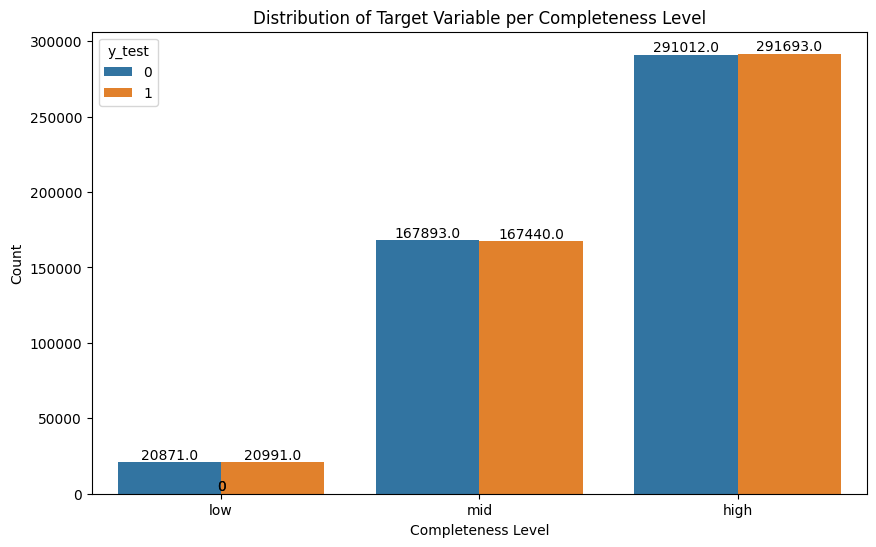

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' is already defined and contains 'target' and 'completeness_level' columns
plt.figure(figsize=(10, 6))

# Order the completeness levels
order = ['low', 'mid', 'high']
ax = sns.countplot(x='completeness_level', hue='y_test', data=results_df, order=order)

plt.title('Distribution of Target Variable per Completeness Level')
plt.xlabel('Completeness Level')
plt.ylabel('Count')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
results_df.head()

,y_test,DT_y_pred_proba,iteration,RF_y_pred_proba,LGBM_y_pred_proba,XGB_y_pred_proba,completeness_level,case_id
0,1,0.731983,0,0.749422,0.863152,0.960844,mid,642035
1,1,0.775148,0,0.645641,0.804602,0.689335,high,1539041
2,0,0.113986,0,0.172363,0.046961,0.027819,high,1817081
3,0,0.113986,0,0.172207,0.116721,0.163814,high,1435206
4,1,0.690063,0,0.585506,0.688801,0.841738,high,2560708


In [ ]:
y_pred_class = (results_df['DT_y_pred_proba'] >= 0.5).astype(int)

f1_score(results_df['y_test'], y_pred_class)

0.6879806557306682

# Calculate Metrics by Thresholds

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, balanced_accuracy_score

def calculate_metrics(y_test, y_pred_proba, threshold):
    # Convert predicted probabilities to class labels (0 and 1)
    y_pred_class = (y_pred_proba >= threshold).astype(int)

    # Calculate the metrics
    metrics = {
        'Metric': ['F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Accuracy', 'Balanced Accuracy'],
        'Score': [f1_score(y_test, y_pred_class),
                   precision_score(y_test, y_pred_class, zero_division=0),
                   recall_score(y_test, y_pred_class),
                   roc_auc_score(y_test, y_pred_proba),
                   accuracy_score(y_test, y_pred_class),
                   balanced_accuracy_score(y_test, y_pred_class)]
    }

    # Create a DataFrame
    df = pd.DataFrame(metrics)

    return df

In [ ]:
threshold = 0.5

# Initialize an empty DataFrame to store the results
metric_results = pd.DataFrame()

# Iterate over each model
for model in ['DT', 'RF', 'LGBM', 'XGB']:
        filtered_df = results_df

        # Extract the y_test and y_pred_proba for the current model and completeness level
        y_test = filtered_df['y_test']
        y_pred_proba = filtered_df[f'{model}_y_pred_proba']

        # Calculate the metrics for the current model and completeness level
        model_metrics = calculate_metrics(y_test, y_pred_proba, threshold)

        # Add columns to indicate the model and completeness level
        model_metrics['Model'] = model

        # Concatenate the results to the metric_results DataFrame
        metric_results = pd.concat([model_metrics, metric_results], ignore_index=True)


In [ ]:
metric_results

,Metric,Score,Model
0,F1 Score,0.763387,XGB
1,Precision,0.749056,XGB
2,Recall,0.778276,XGB
3,ROC AUC,0.836157,XGB
4,Accuracy,0.758684,XGB
5,Balanced Accuracy,0.758677,XGB
6,F1 Score,0.776104,LGBM
7,Precision,0.754942,LGBM
8,Recall,0.798487,LGBM
9,ROC AUC,0.847750,LGBM


In [ ]:
# Define the completeness levels and threshold
completeness_levels = ['low', 'mid', 'high']
threshold = 0.5

# Initialize an empty DataFrame to store the results
metric_results = pd.DataFrame()

# Iterate over each model
for model in ['DT', 'RF', 'LGBM', 'XGB']:
    # Iterate over each completeness level
    for completeness_level in completeness_levels:
        # Filter the results_df for the current completeness level
        filtered_df = results_df[results_df['completeness_level'] == completeness_level]

        # Extract the y_test and y_pred_proba for the current model and completeness level
        y_test = filtered_df['y_test']
        y_pred_proba = filtered_df[f'{model}_y_pred_proba']

        # Calculate the metrics for the current model and completeness level
        model_metrics = calculate_metrics(y_test, y_pred_proba, threshold)

        # Add columns to indicate the model and completeness level
        model_metrics['Model'] = model
        model_metrics['Completeness Level'] = completeness_level

        # Concatenate the results to the metric_results DataFrame
        metric_results = pd.concat([model_metrics, metric_results], ignore_index=True)

# Pivot the table to have completeness levels as columns
metric_results = metric_results.pivot_table(index=['Model', 'Metric'], columns='Completeness Level', values='Score')

# Reset the index to make 'Model' and 'Metric' regular columns
metric_results = metric_results.reset_index()

# Display the final metric_results DataFrame
metric_results

Completeness Level,Model,Metric,high,low,mid
0,DT,Accuracy,0.688940,0.607568,0.679062
1,DT,Balanced Accuracy,0.688924,0.607225,0.679084
2,DT,F1 Score,0.693400,0.650021,0.683803
3,DT,Precision,0.684377,0.587922,0.672966
4,DT,ROC AUC,0.754751,0.629220,0.738913
5,DT,Recall,0.702663,0.726788,0.694995
6,LGBM,Accuracy,0.777932,0.689193,0.765054
7,LGBM,Balanced Accuracy,0.777896,0.689114,0.765089
8,LGBM,F1 Score,0.784821,0.698100,0.770630
9,LGBM,Precision,0.762044,0.680494,0.751796


In [ ]:
def calculate_metrics_by_threshold(threshold, results_df):
    """
    Calculate metrics for different models and completeness levels at a given threshold.

    Args:
    - threshold (float): The threshold value.
    - results_df (pd.DataFrame): The DataFrame containing the results.

    Returns:
    - pd.DataFrame: A DataFrame with the calculated metrics.
    """
    completeness_levels = ['low', 'mid', 'high']
    metric_results = pd.DataFrame()

    for model in ['DT', 'RF', 'LGBM', 'XGB']:
        for completeness_level in completeness_levels:
            filtered_df = results_df[results_df['completeness_level'] == completeness_level]
            y_test = filtered_df['y_test']
            y_pred_proba = filtered_df[f'{model}_y_pred_proba']
            model_metrics = calculate_metrics(y_test, y_pred_proba, threshold)
            model_metrics['Model'] = model
            model_metrics['Completeness Level'] = completeness_level
            metric_results = pd.concat([model_metrics, metric_results], ignore_index=True)

    metric_results = metric_results.pivot_table(index=['Model', 'Metric'], columns='Completeness Level', values='Score')
    metric_results = metric_results.reset_index()

    return metric_results

In [ ]:
threshold = 0.5
metric_results = calculate_metrics_by_threshold(threshold, results_df)
metric_results

Completeness Level,Model,Metric,high,low,mid
0,DT,Accuracy,0.688940,0.607568,0.679062
1,DT,Balanced Accuracy,0.688924,0.607225,0.679084
2,DT,F1 Score,0.693400,0.650021,0.683803
3,DT,Precision,0.684377,0.587922,0.672966
4,DT,ROC AUC,0.754751,0.629220,0.738913
5,DT,Recall,0.702663,0.726788,0.694995
6,LGBM,Accuracy,0.777932,0.689193,0.765054
7,LGBM,Balanced Accuracy,0.777896,0.689114,0.765089
8,LGBM,F1 Score,0.784821,0.698100,0.770630
9,LGBM,Precision,0.762044,0.680494,0.751796


In [ ]:
# prompt: for thresholds range between 0.01 - 0.99,  calculate metric_results for threshold range with increment by 0.01 and append columns to a new full_results_df

# Create an empty DataFrame to store the results for all thresholds
full_results_df = pd.DataFrame()

# Iterate over the thresholds
for threshold in [round(x * 0.01, 2) for x in range(1, 100)]:
    # Calculate the metrics for the current threshold
    metric_results = calculate_metrics_by_threshold(threshold, results_df)

    # Add a 'Threshold' column to the metric_results DataFrame
    metric_results['Threshold'] = threshold

    # Concatenate the results to the full_results_df
    full_results_df = pd.concat([full_results_df, metric_results], ignore_index=True)

# Display the final full_results_df
full_results_df


Completeness Level,Model,Metric,high,low,mid,Threshold
0,DT,Accuracy,0.500500,0.501433,0.499444,0.01
1,DT,Balanced Accuracy,0.499916,0.500000,0.500119,0.01
2,DT,F1 Score,0.667063,0.667939,0.666070,0.01
3,DT,Precision,0.500542,0.501433,0.499384,0.01
4,DT,ROC AUC,0.754751,0.629220,0.738913,0.01
...,...,...,...,...,...,...
2371,XGB,Balanced Accuracy,0.503381,0.500000,0.501798,0.99
2372,XGB,F1 Score,0.014276,0.000000,0.007413,0.99
2373,XGB,Precision,0.943770,0.000000,0.967391,0.99
2374,XGB,ROC AUC,0.843110,0.753534,0.832856,0.99


In [ ]:
full_results_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/full50_metrics_results_df.csv', index=False)


In [ ]:
full_results_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/full50_metrics_results_df.csv')

# Plots

## Metric by model

In [ ]:
# prompt: change  plot_metric_by_completeness_level to plot by model instead

def plot_metric_by_model(metric):
    """
    Plot the specified metric by model.

    Args:
        metric (str): The metric to plot (e.g., 'F1 Score', 'Accuracy', etc.)
    """
    # Filter for the specified metric
    metric_df = full_results_df[full_results_df['Metric'] == metric]

    # Define the models
    models = ['DT', 'RF', 'LGBM', 'XGB']

    # Create a figure with four subplots
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    # Iterate over the models and create a plot for each
    for i, model in enumerate(models):
        row = i // 2
        col = i % 2

        model_df = metric_df[metric_df['Model'] == model]
        sns.lineplot(x='Threshold', y='low', data=model_df, ax=axs[row, col], label='Low')
        sns.lineplot(x='Threshold', y='mid', data=model_df, ax=axs[row, col], label='Mid')
        sns.lineplot(x='Threshold', y='high', data=model_df, ax=axs[row, col], label='High')

        axs[row, col].set_title(f'{metric} for {model} Model')
        axs[row, col].set_xlabel('Threshold')
        axs[row, col].set_ylabel(metric)
        axs[row, col].legend(title='Completeness Level')

    # Layout so plots do not overlap
    fig.tight_layout()

    plt.show()


In [ ]:
# prompt: update plot_metric_by_model to export to pdf in /content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/

def plot_metric_by_model(metric):
    """
    Plot the specified metric by model and export to PDF.

    Args:
        metric (str): The metric to plot (e.g., 'F1 Score', 'Accuracy', etc.)
    """
    # Filter for the specified metric
    metric_df = full_results_df[full_results_df['Metric'] == metric]

    # Define the models
    models = ['DT', 'RF', 'LGBM', 'XGB']

    # Create a figure with four subplots
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    # Iterate over the models and create a plot for each
    for i, model in enumerate(models):
        row = i // 2
        col = i % 2

        model_df = metric_df[metric_df['Model'] == model]
        sns.lineplot(x='Threshold', y='low', data=model_df, ax=axs[row, col], label='Low')
        sns.lineplot(x='Threshold', y='mid', data=model_df, ax=axs[row, col], label='Mid')
        sns.lineplot(x='Threshold', y='high', data=model_df, ax=axs[row, col], label='High')

        axs[row, col].set_title(f'{metric} for {model} Model')
        axs[row, col].set_xlabel('Threshold')
        axs[row, col].set_ylabel(metric)
        axs[row, col].legend(title='Completeness Level')

    # Layout so plots do not overlap
    fig.tight_layout()

    # Export to PDF
    fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/{}.pdf'.format(metric))
    plt.show()


In [ ]:
full_results_df['Metric'].unique()

array(['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision',
       'ROC AUC', 'Recall'], dtype=object)

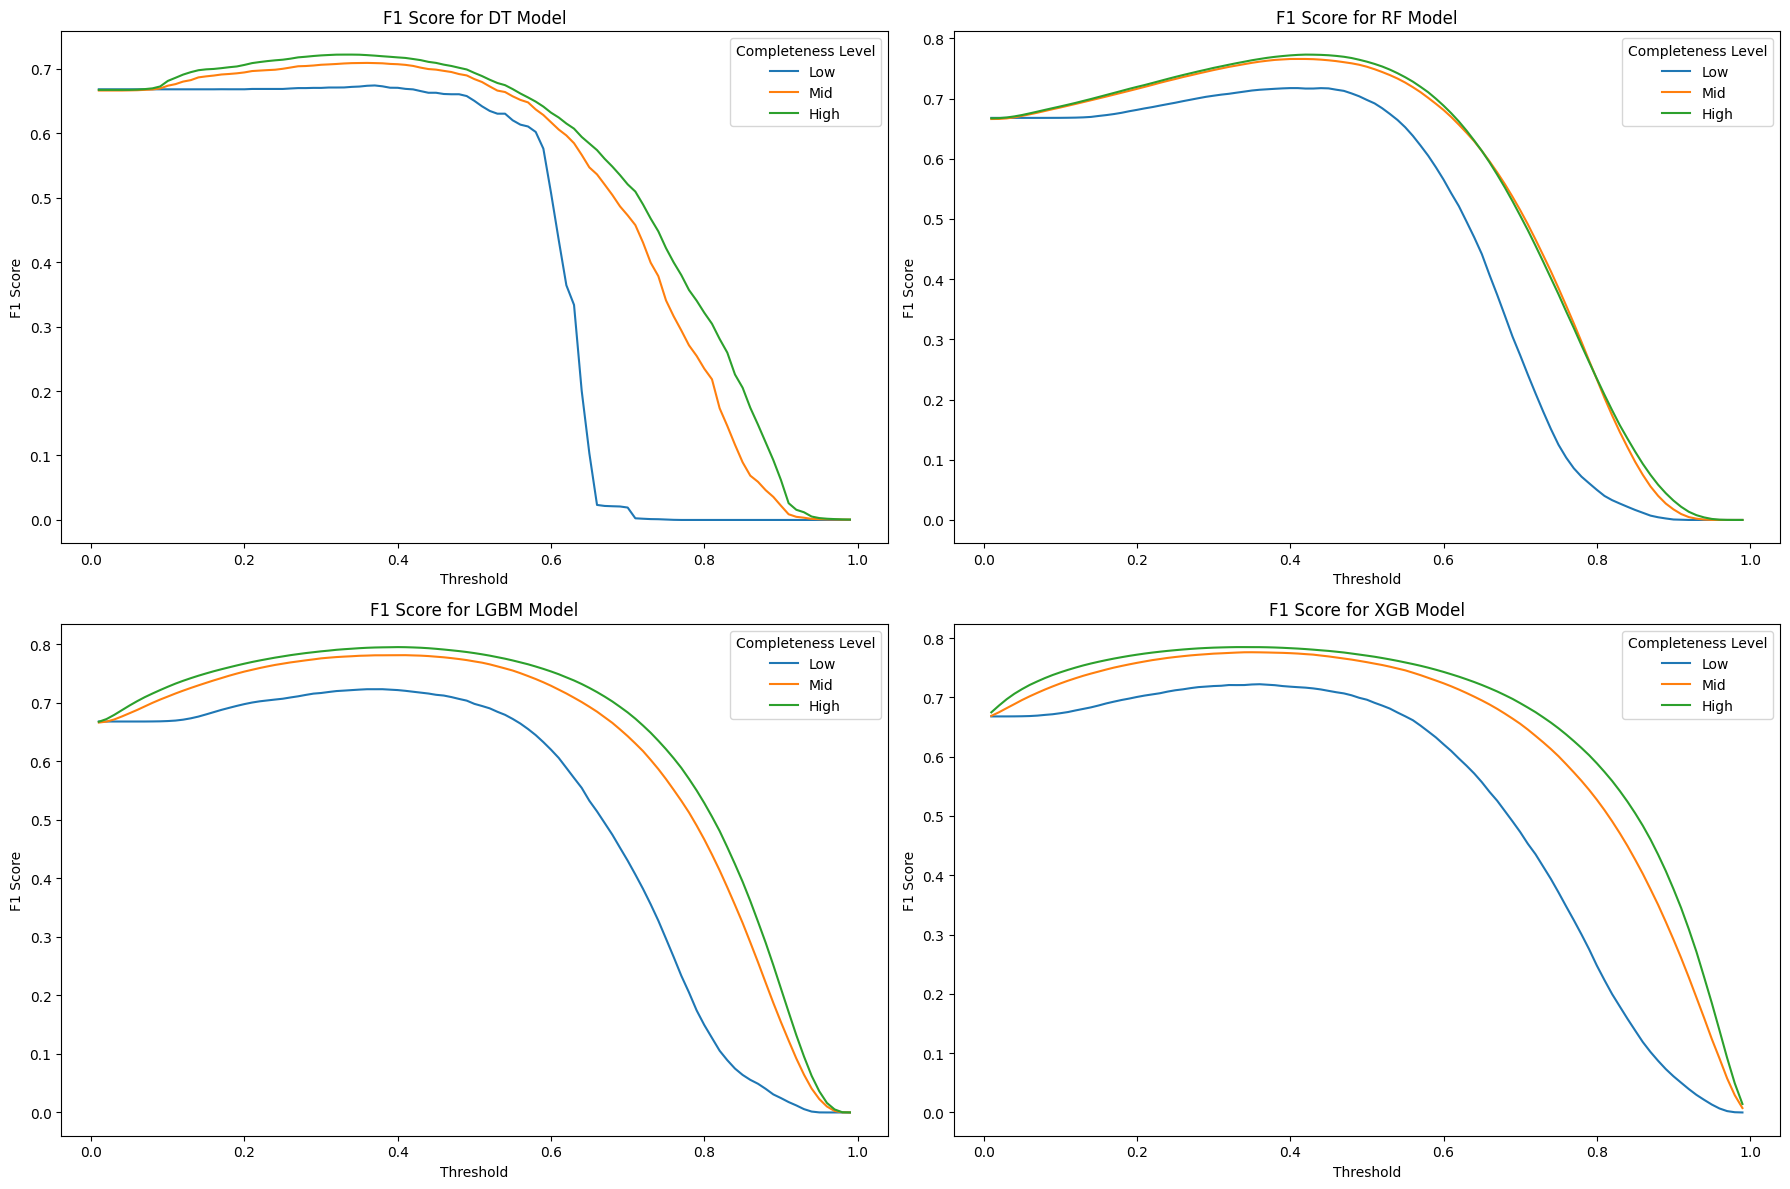

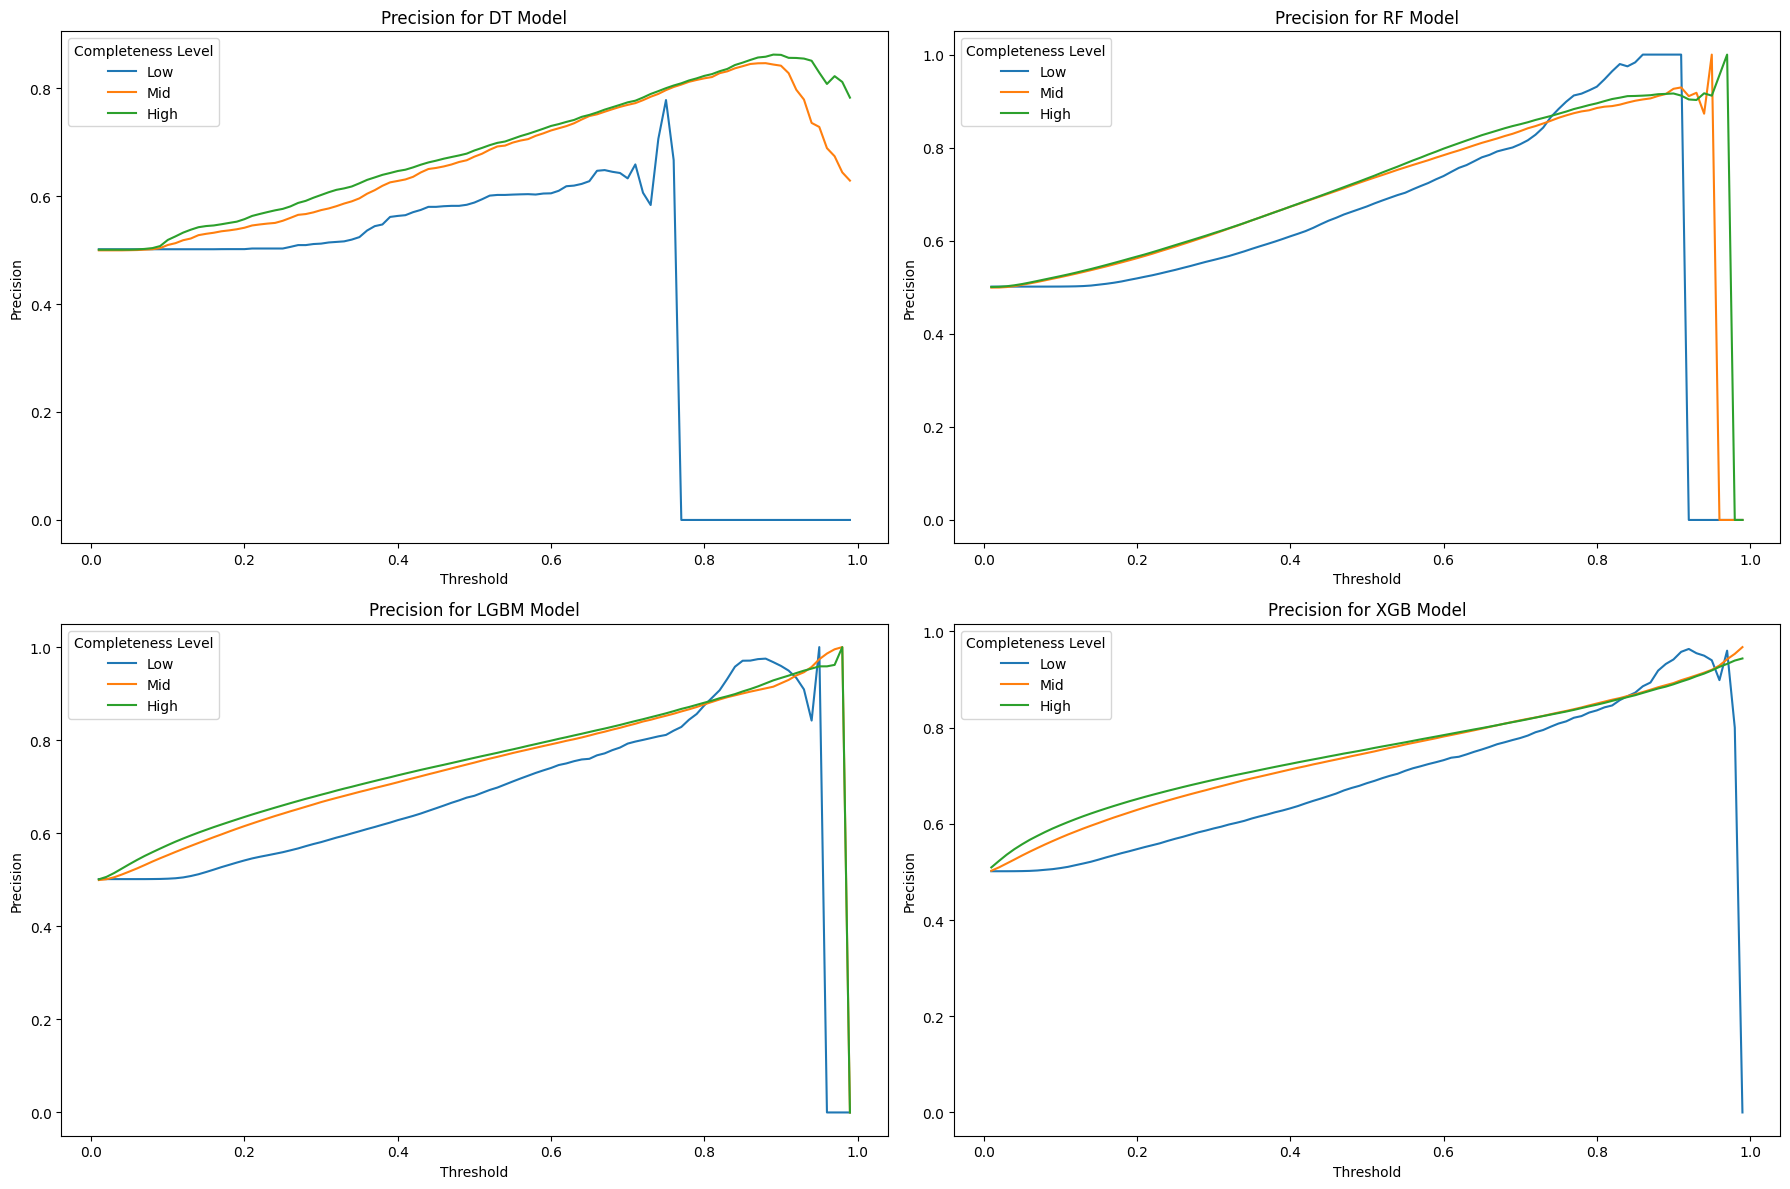

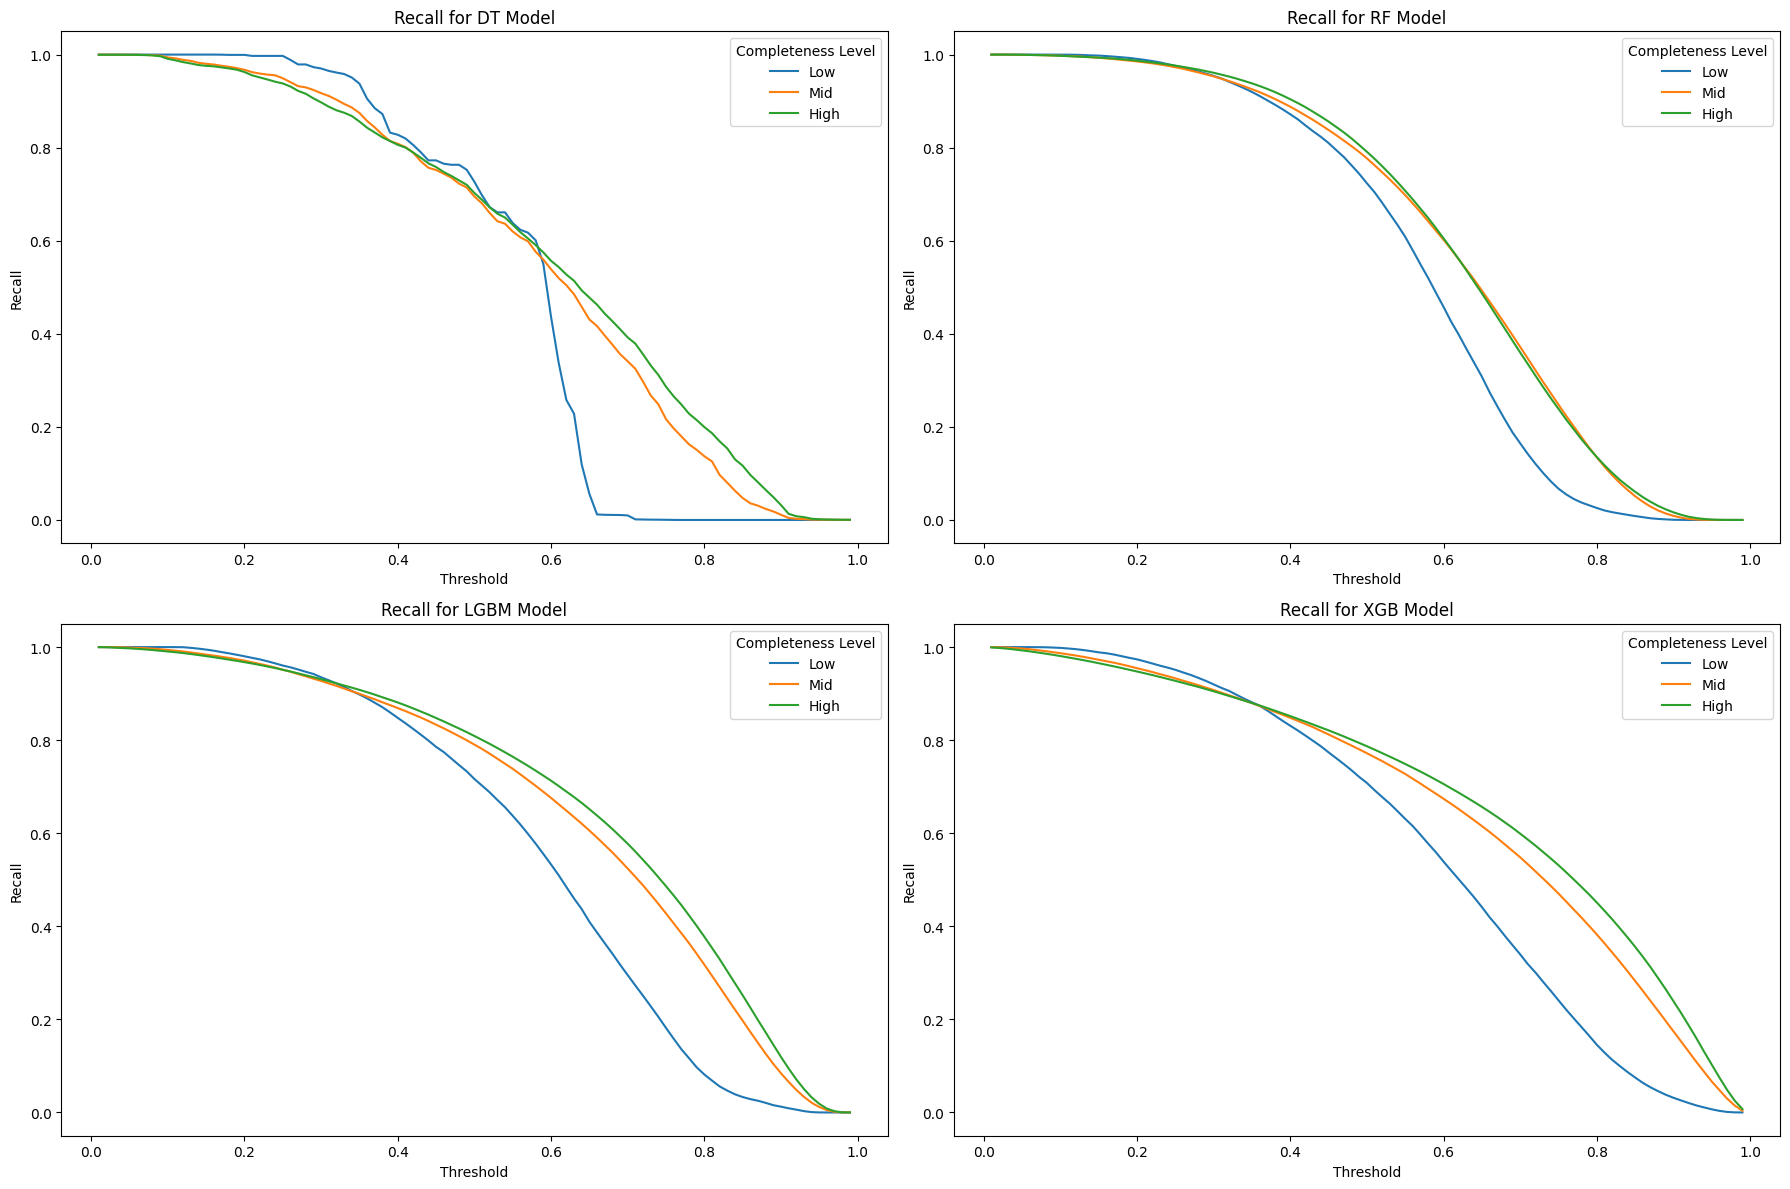

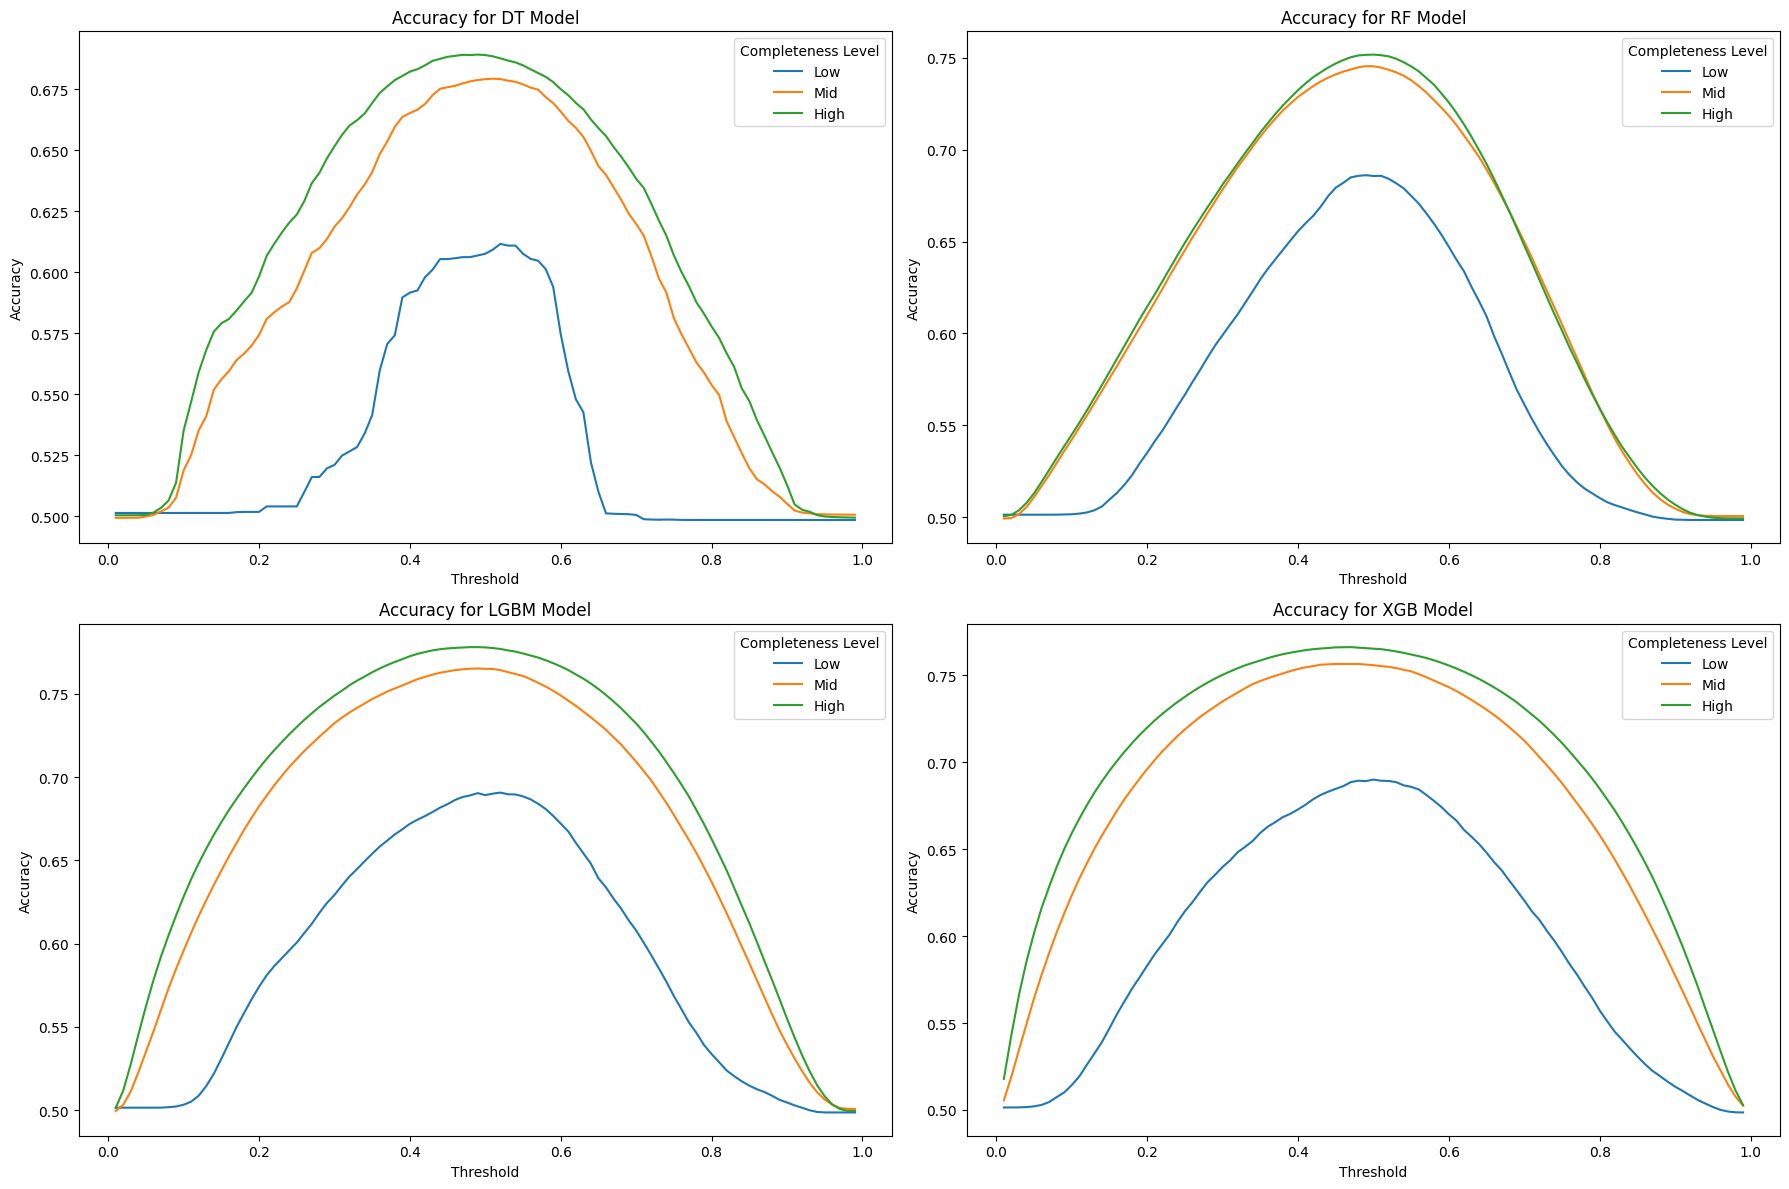

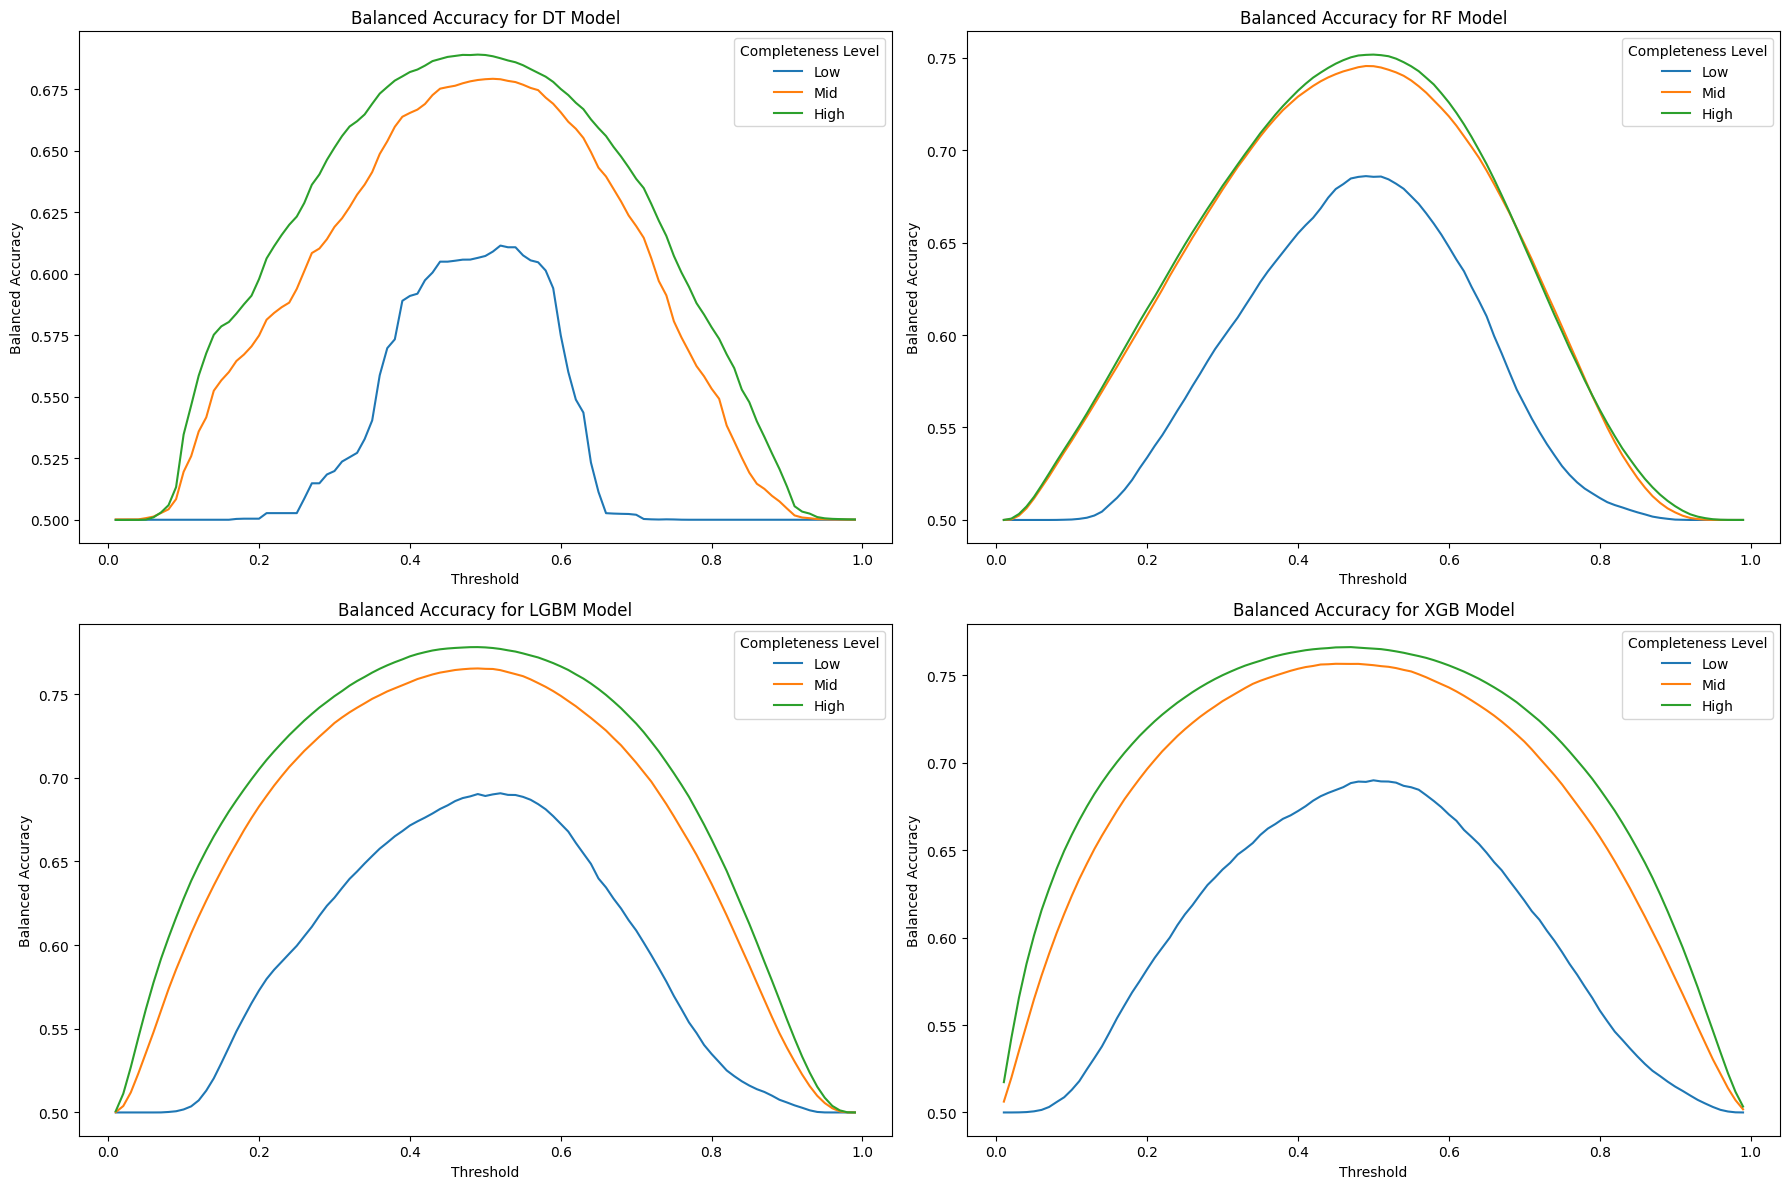

In [ ]:
for metric in ['F1 Score', 'Precision', 'Recall', 'Accuracy', 'Balanced Accuracy']:
    plot_metric_by_model(metric)

## Metric by Completeness Level

In [ ]:
def plot_metric_by_completeness_level(metric):
    """
    Plot the specified metric by completeness level.

    Args:
        metric (str): The metric to plot (e.g., 'F1 Score', 'Accuracy', etc.)
    """
    # Filter for the specified metric
    metric_df = full_results_df[full_results_df['Metric'] == metric]

    # Define the completeness levels
    levels = ['low', 'mid', 'high']

    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Iterate over the completeness levels and create a plot for each
    for i, level in enumerate(levels):
        sns.lineplot(x='Threshold', y=level, hue='Model', data=metric_df, ax=axs[i])
        axs[i].set_title(f'{metric} for {level.capitalize()} Completeness Level')
        axs[i].set_xlabel('Threshold')
        axs[i].set_ylabel(metric)

    # Layout so plots do not overlap
    fig.tight_layout()

    plt.show()



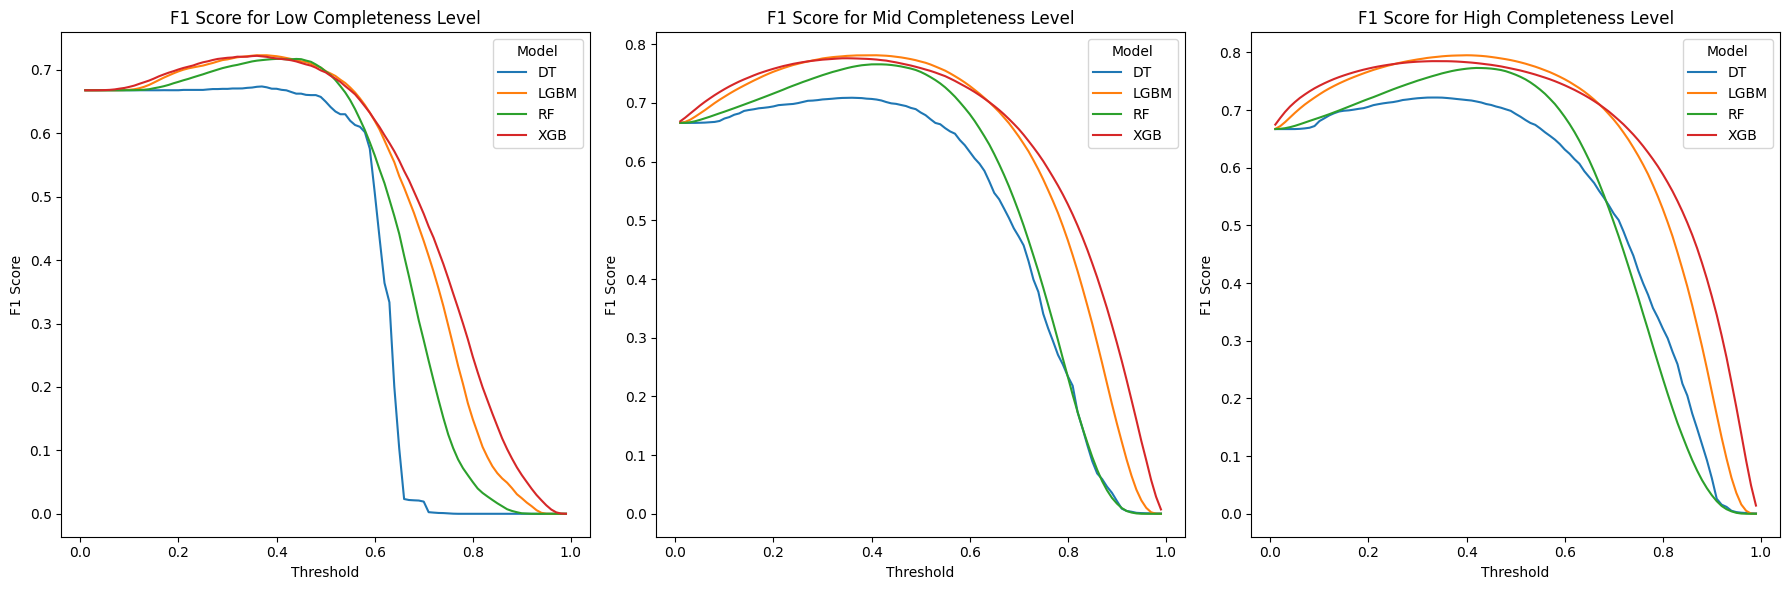

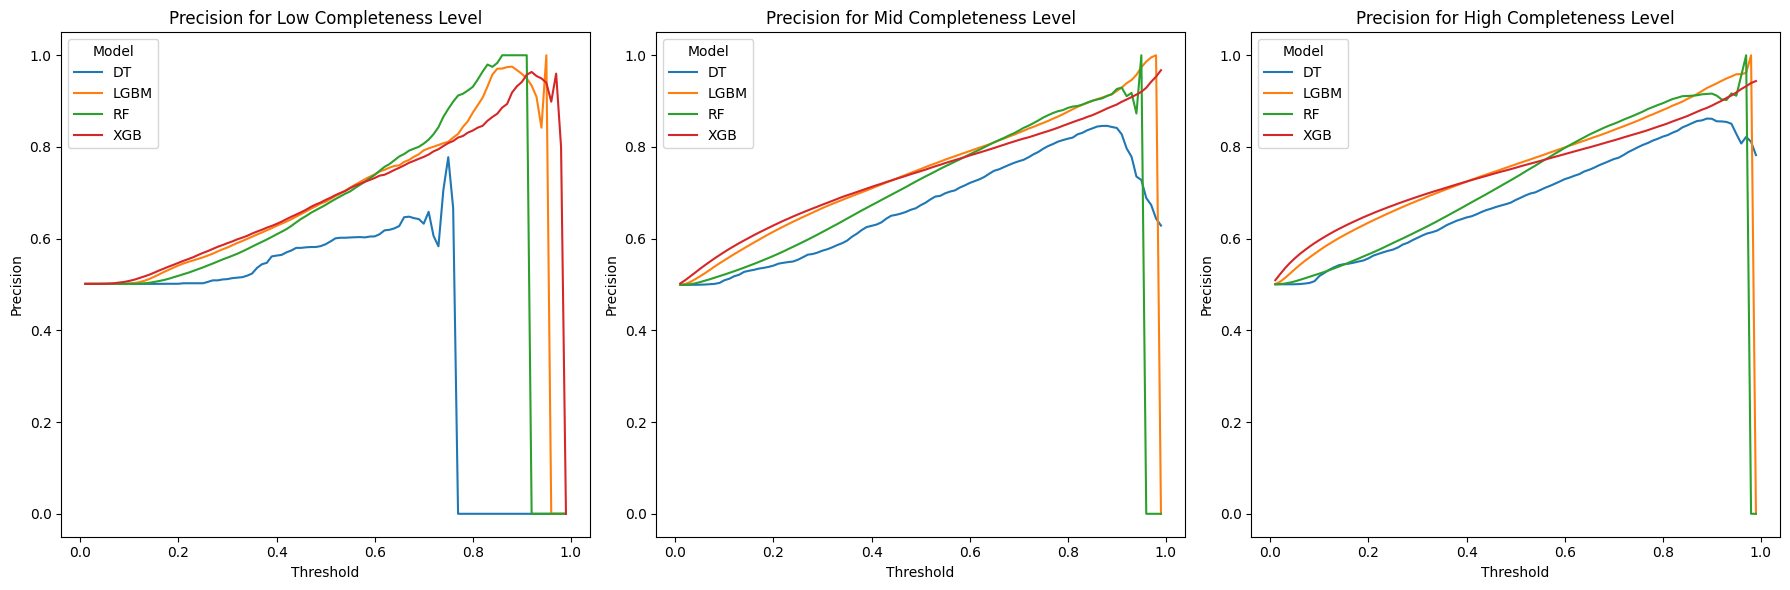

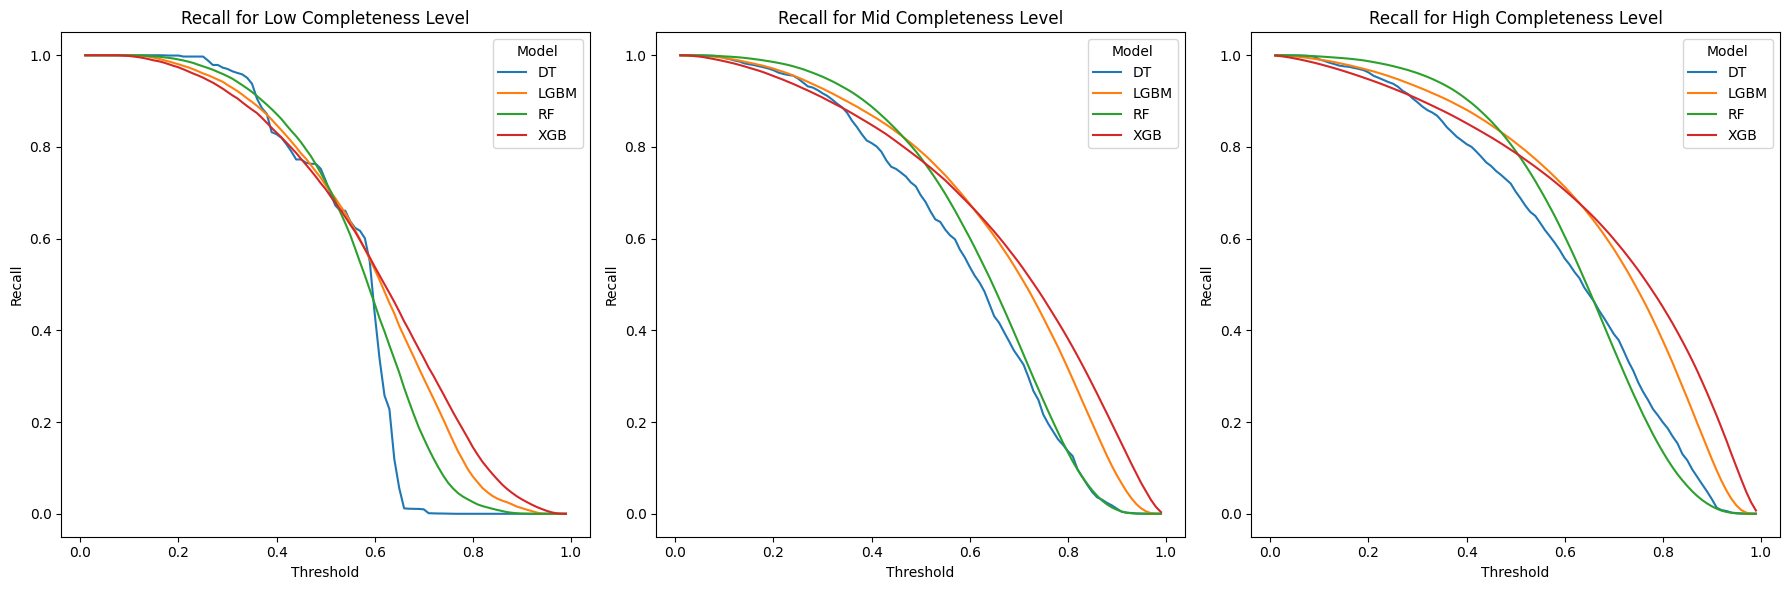

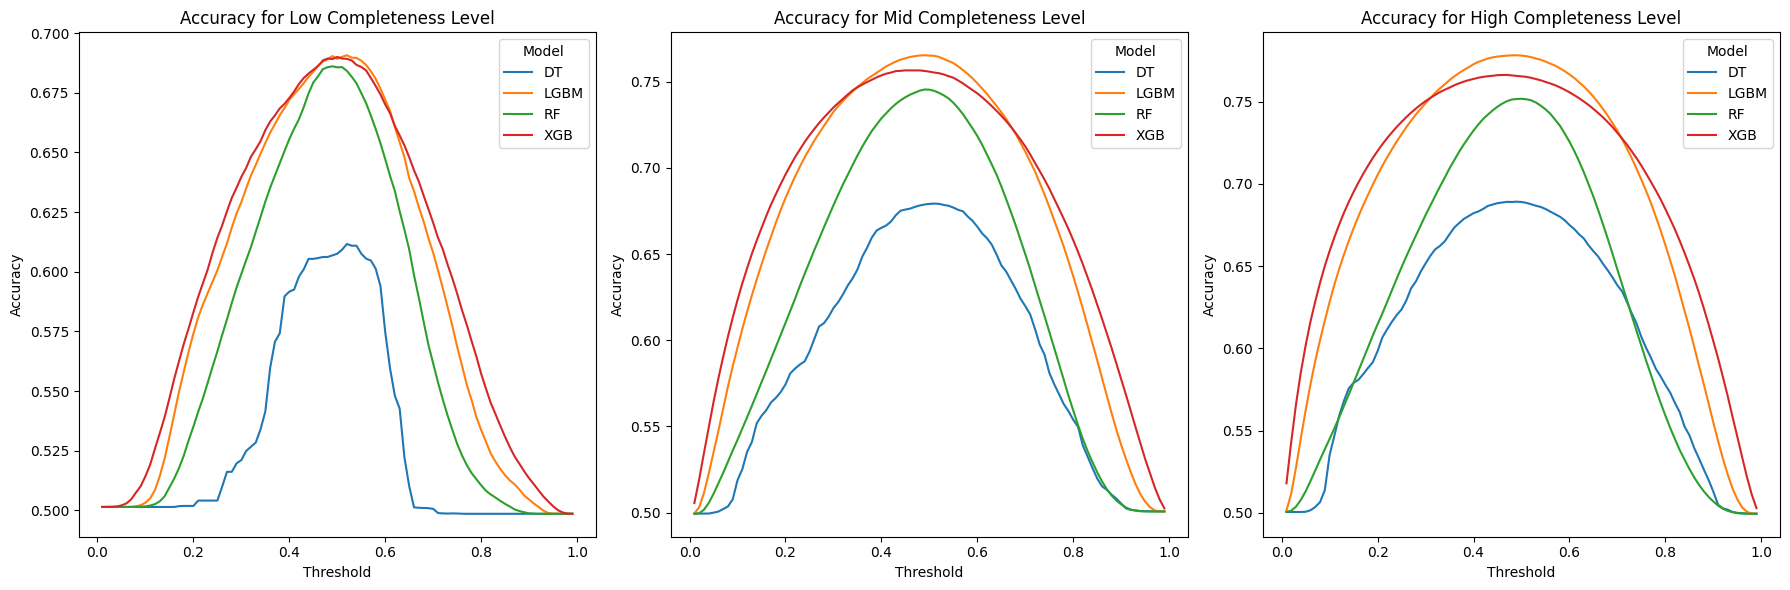

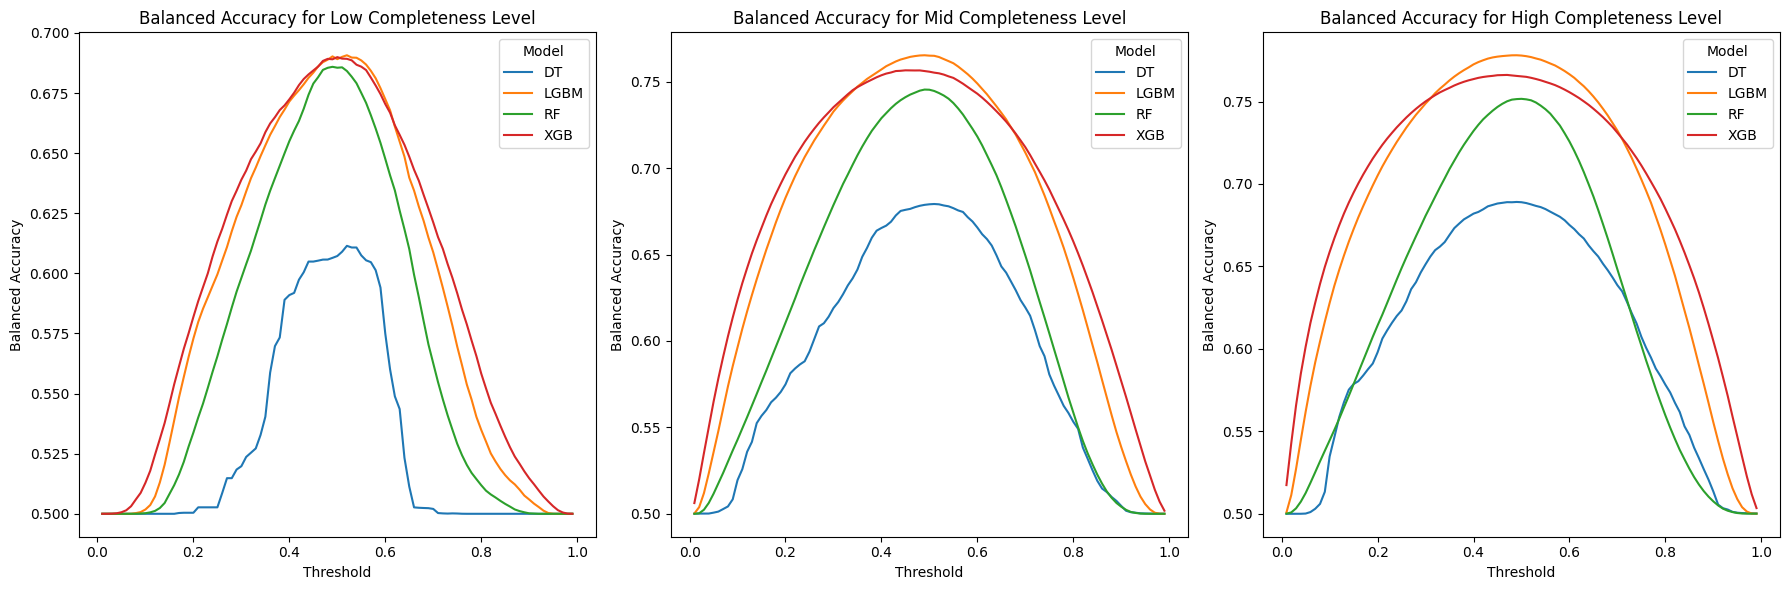

In [ ]:
for metric in ['F1 Score', 'Precision', 'Recall', 'Accuracy', 'Balanced Accuracy']:
    plot_metric_by_completeness_level(metric)

## AUC_ROC

In [ ]:
results_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/model_results_df.csv')

Text(0.5, 1.0, 'ROC Curves for Each Model')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

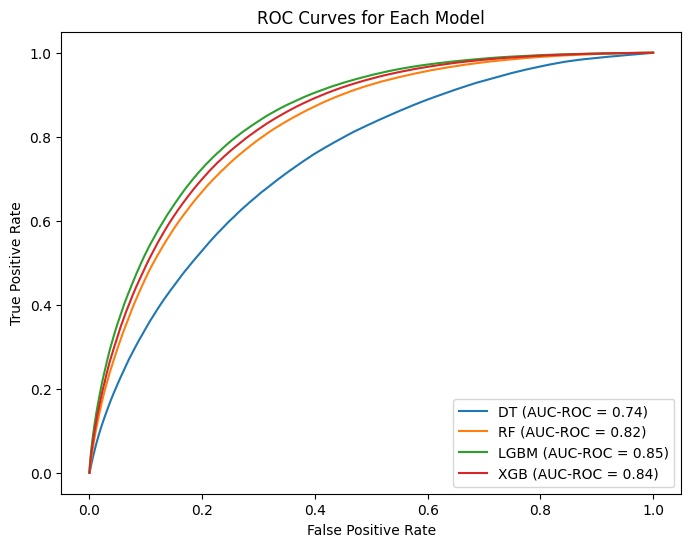

In [ ]:
# Define the models
models = ['DT', 'RF', 'LGBM', 'XGB']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each model
for model in models:
    # Extract the y_test and y_pred_proba for the current model
    y_test = results_df['y_test']
    y_pred_proba = results_df[f'{model}_y_pred_proba']

    # Calculate the FPR and TPR
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC-ROC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'{model} (AUC-ROC = {roc_auc:.2f})')

# Set the title and labels
ax.set_title('ROC Curves for Each Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'ROC Curves for Low Completeness Level')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for Mid Completeness Level')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for High Completeness Level')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

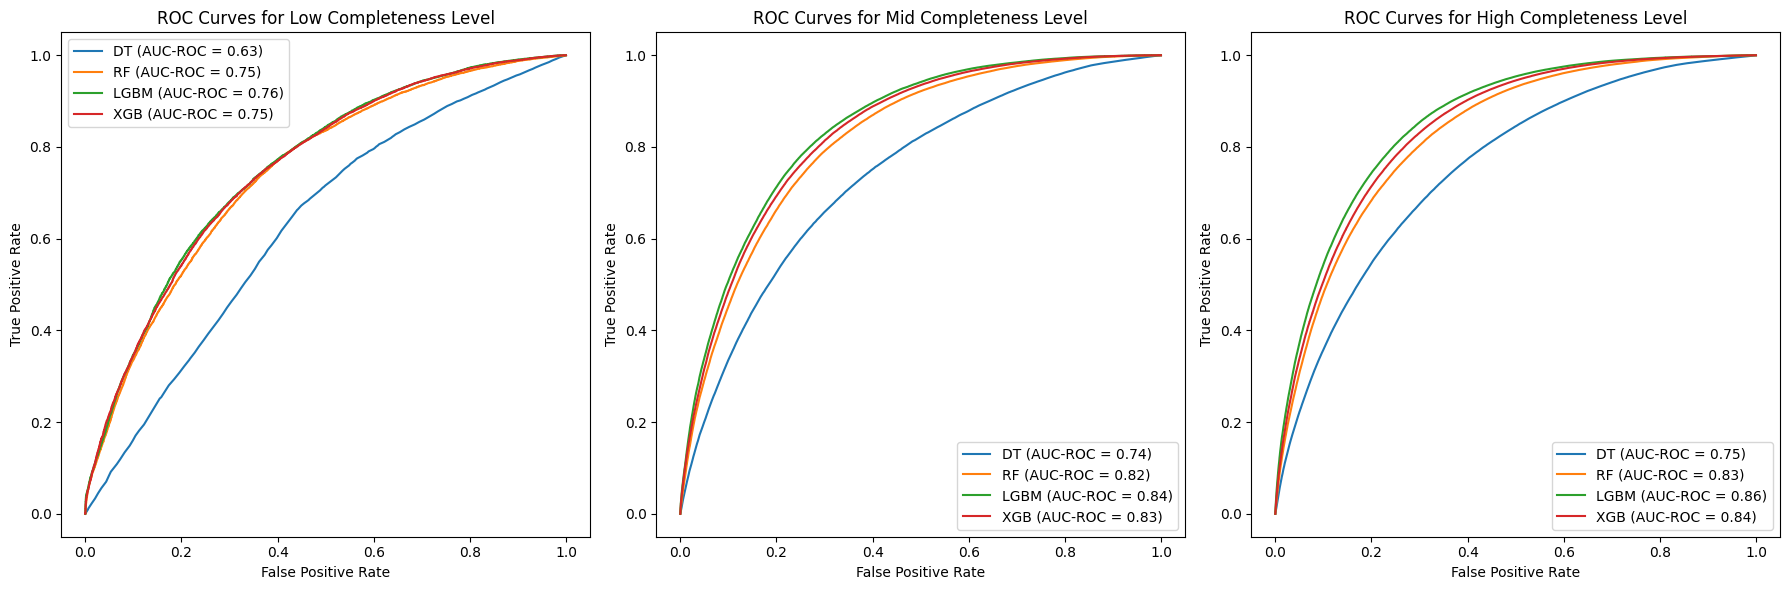

In [ ]:
# Define the models and completeness levels
models = ['DT', 'RF', 'LGBM', 'XGB']
completeness_levels = ['low', 'mid', 'high']

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Iterate over each completeness level
for i, level in enumerate(completeness_levels):
    # Filter the results_df for the current completeness level
    filtered_df = results_df[results_df['completeness_level'] == level]

    # Iterate over each model
    for model in models:
        # Extract the y_test and y_pred_proba for the current model
        y_test = filtered_df['y_test']
        y_pred_proba = filtered_df[f'{model}_y_pred_proba']

        # Calculate the FPR and TPR
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Calculate the AUC-ROC
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        axs[i].plot(fpr, tpr, label=f'{model} (AUC-ROC = {roc_auc:.2f})')

    # Set the title and labels
    axs[i].set_title(f'ROC Curves for {level.capitalize()} Completeness Level')
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')

    # Add a legend
    axs[i].legend()

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'ROC Curves for DT')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for RF')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for LGBM')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for XGB')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

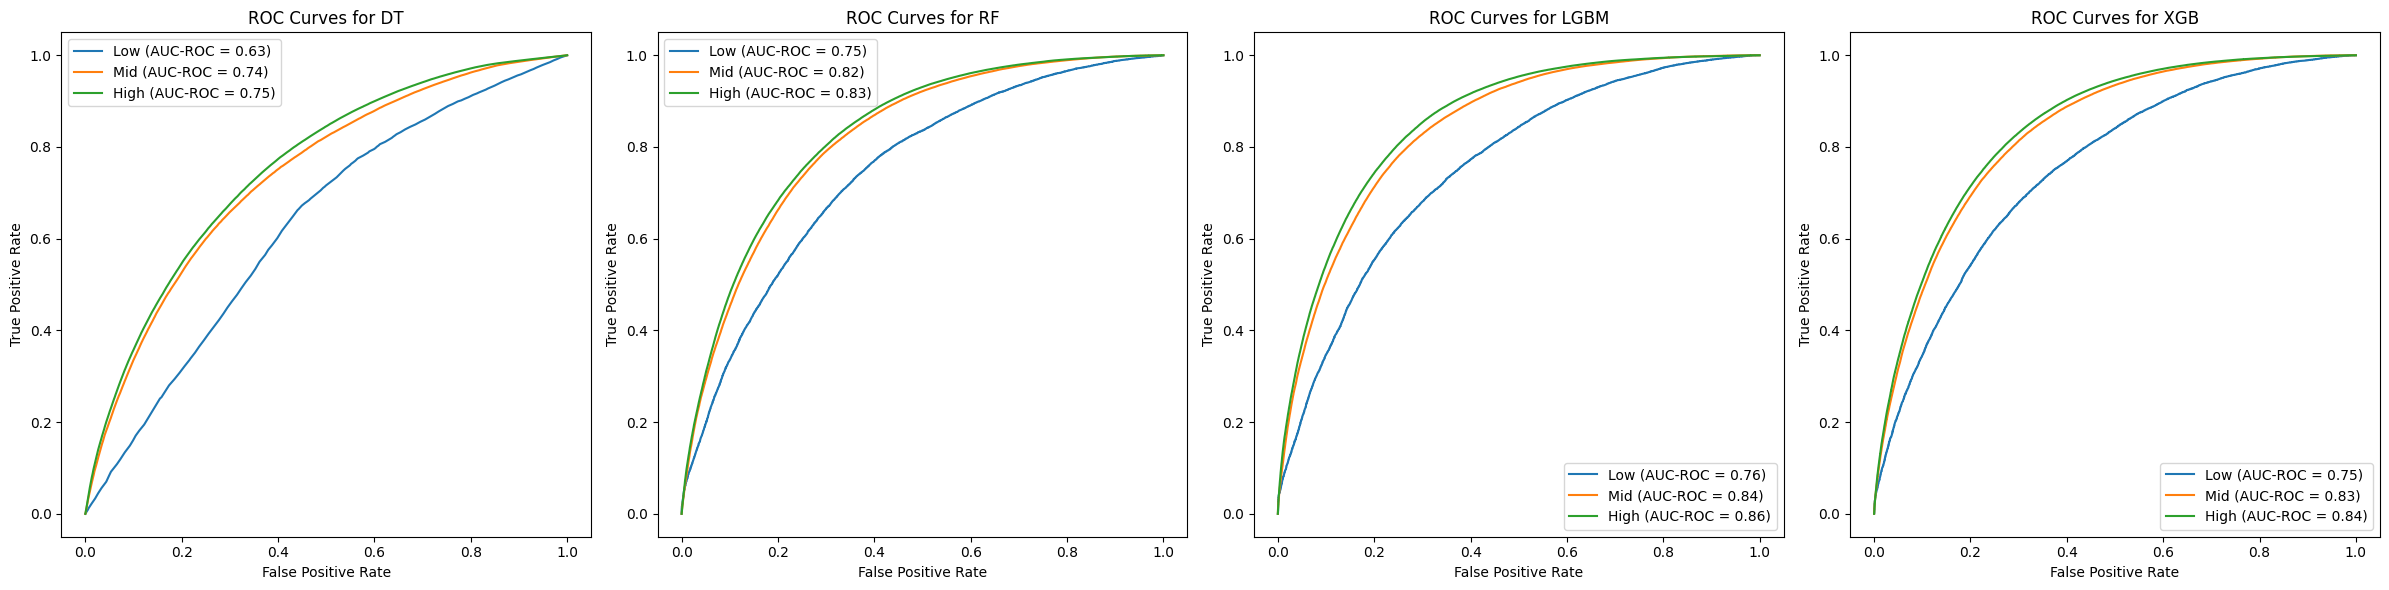

In [ ]:
# Define the models and completeness levels
models = ['DT', 'RF', 'LGBM', 'XGB']
completeness_levels = ['low', 'mid', 'high']

# Create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Iterate over each model
for i, model in enumerate(models):
    # Iterate over each completeness level
    for level in completeness_levels:
        # Filter the results_df for the current completeness level
        filtered_df = results_df[results_df['completeness_level'] == level]

        # Extract the y_test and y_pred_proba for the current model
        y_test = filtered_df['y_test']
        y_pred_proba = filtered_df[f'{model}_y_pred_proba']

        # Calculate the FPR and TPR
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Calculate the AUC-ROC
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        axs[i].plot(fpr, tpr, label=f'{level.capitalize()} (AUC-ROC = {roc_auc:.2f})')

    # Set the title and labels
    axs[i].set_title(f'ROC Curves for {model}')
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')

    # Add a legend
    axs[i].legend()

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'ROC Curves for DT')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for RF')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for LGBM')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves for XGB')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

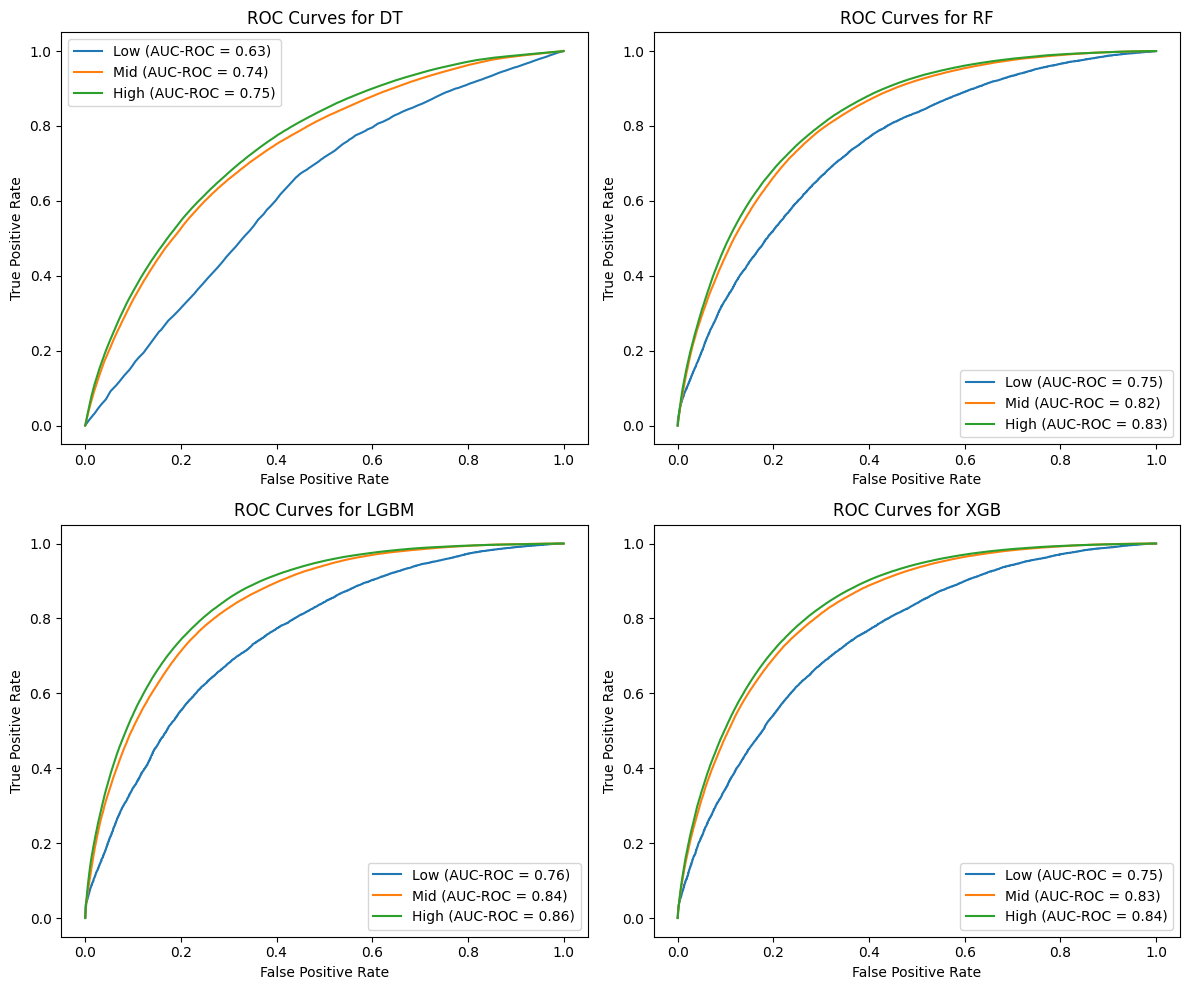

In [ ]:
# Define the models and completeness levels
models = ['DT', 'RF', 'LGBM', 'XGB']
completeness_levels = ['low', 'mid', 'high']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over each model
for i, model in enumerate(models):
    # Iterate over each completeness level
    for level in completeness_levels:
        # Filter the results_df for the current completeness level
        filtered_df = results_df[results_df['completeness_level'] == level]

        # Extract the y_test and y_pred_proba for the current model
        y_test = filtered_df['y_test']
        y_pred_proba = filtered_df[f'{model}_y_pred_proba']

        # Calculate the FPR and TPR
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Calculate the AUC-ROC
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        axs[i // 2, i % 2].plot(fpr, tpr, label=f'{level.capitalize()} (AUC-ROC = {roc_auc:.2f})')

    # Set the title and labels
    axs[i // 2, i % 2].set_title(f'ROC Curves for {model}')
    axs[i // 2, i % 2].set_xlabel('False Positive Rate')
    axs[i // 2, i % 2].set_ylabel('True Positive Rate')

    # Add a legend
    axs[i // 2, i % 2].legend()

# Layout so plots do not overlap
fig.tight_layout()

# Export to PDF
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/ROC.pdf')
plt.show()

# STO Policies

In [ ]:
full_results_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/full50_metrics_results_df.csv')

In [ ]:
full_results_df.head()

,Model,Metric,high,low,mid,Threshold
0,DT,Accuracy,0.500500,0.501433,0.499444,0.01
1,DT,Balanced Accuracy,0.499916,0.500000,0.500119,0.01
2,DT,F1 Score,0.667063,0.667939,0.666070,0.01
3,DT,Precision,0.500542,0.501433,0.499384,0.01
4,DT,ROC AUC,0.754751,0.629220,0.738913,0.01


In [ ]:
full_results_df[(full_results_df['Model'] == 'LGBM') & (full_results_df['Metric'] == 'Accuracy') & (full_results_df['Threshold'] == 0.05)]

Completeness Level,index,Model,Metric,high,low,mid,Threshold
102,102,LGBM,Accuracy,0.562278,0.501433,0.534979,0.05


In [ ]:
# prompt: from full_results_df, filter for all records with Threshold = 0.05 and create a new dataframe with columns: model, metric, high_threshold, high_score, mid_threshold, mid_score, low_threshold and low_score

# Filter for Threshold = 0.05
filtered_df = full_results_df[full_results_df['Threshold'] == 0.05]

# Create the new DataFrame
new_df = pd.DataFrame()

# Iterate through each model
for model in filtered_df['Model'].unique():
    model_df = filtered_df[filtered_df['Model'] == model]

    # Create a dictionary to hold the data for this model
    model_data = {'model': model}

    # Iterate through metrics
    for metric in model_df['Metric'].unique():
        metric_df = model_df[model_df['Metric'] == metric]

        # Add each completeness level score to the data dictionary
        model_data['metric'] = metric
        model_data['high_threshold'] = 0.05
        model_data['high_score'] = metric_df['high'].iloc[0]
        model_data['mid_threshold'] = 0.05
        model_data['mid_score'] = metric_df['mid'].iloc[0]
        model_data['low_threshold'] = 0.05
        model_data['low_score'] = metric_df['low'].iloc[0]


        # Append the model data as a new row to the new DataFrame
        new_df = pd.concat([new_df, pd.DataFrame([model_data])], ignore_index=True)

# Display the new DataFrame
new_df


,model,metric,high_threshold,high_score,mid_threshold,mid_score,low_threshold,low_score
0,DT,Accuracy,0.05,0.500644,0.05,0.499990,0.05,0.501433
1,DT,Balanced Accuracy,0.05,0.500061,0.05,0.500664,0.05,0.500000
2,DT,F1 Score,0.05,0.667111,0.05,0.666285,0.05,0.667939
3,DT,Precision,0.05,0.500615,0.05,0.499657,0.05,0.501433
4,DT,ROC AUC,0.05,0.754751,0.05,0.738913,0.05,0.629220
5,DT,Recall,0.05,0.999541,0.05,0.999654,0.05,1.000000
6,LGBM,Accuracy,0.05,0.562278,0.05,0.534979,0.05,0.501433
7,LGBM,Balanced Accuracy,0.05,0.561769,0.05,0.535605,0.05,0.500000
8,LGBM,F1 Score,0.05,0.695221,0.05,0.682075,0.05,0.667939
9,LGBM,Precision,0.05,0.533594,0.05,0.517804,0.05,0.501433


In [ ]:
# Save the new DataFrame to a CSV file (optional)
new_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_metrics50_at_0.5_threshold.csv', index=False)


## Policy 1 - Unbounded Threshold

### F1 score - XGB

In [ ]:
# prompt: for model = 'XGB', and Metric = 'F1 score', find the threshold for 'high', 'low' and 'mid' such that the differences is minimized between the pairs: 'high' and 'low', 'high' and 'mid', and 'mid' and 'low'

# Filter data for XGBoost and F1 Score
xgb_f1_df = full_results_df[(full_results_df['Model'] == 'XGB') & (full_results_df['Metric'] == 'F1 Score')]

# Function to find optimal thresholds
def find_optimal_thresholds(df):
    min_diff = float('inf')
    optimal_thresholds = None
    for high in df['Threshold'].unique():
        high_f1 = df[df["Threshold"] == high]
        for mid in df['Threshold'].unique():
            mid_f1 = df[df["Threshold"] == mid]
            for low in df['Threshold'].unique():
                    low_f1 = df[df["Threshold"] == low]

                    diff1 = abs(high_f1['high'].iloc[0] - low_f1['low'].iloc[0])
                    diff2 = abs(high_f1['high'].iloc[0] - mid_f1['mid'].iloc[0])
                    diff3 = abs(mid_f1['mid'].iloc[0] - low_f1['low'].iloc[0])
                    total_diff = diff1 + diff2 + diff3
                    sum_f1 = high_f1['high'].iloc[0] + mid_f1['mid'].iloc[0] + low_f1['low'].iloc[0]

                    if total_diff < min_diff:
                        min_diff = total_diff
                        max_sum_f1 = sum_f1
                        optimal_thresholds = (high, mid, low)
                    elif total_diff == min_diff and sum_f1 > max_sum_f1:
                        max_sum_f1 = sum_f1
                        optimal_thresholds = (high, mid, low)


    return optimal_thresholds

# Find optimal thresholds
optimal_thresholds = find_optimal_thresholds(xgb_f1_df)

# Print the optimal thresholds
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")


Optimal thresholds for 'high', 'mid', 'low': (0.72, 0.02, 0.11)


In [ ]:
# prompt: add a condition to find_optimal_thresholds to that all scores has to be > 0 and < 1

# Function to find optimal thresholds
def find_optimal_thresholds(df):
    min_diff = float('inf')
    optimal_thresholds = None
    for high in df['Threshold'].unique():
        high_f1 = df[df["Threshold"] == high]
        for mid in df['Threshold'].unique():
            mid_f1 = df[df["Threshold"] == mid]
            for low in df['Threshold'].unique():
                    low_f1 = df[df["Threshold"] == low]

                    #Check if all scores are between 0 and 1
                    if (0 < high_f1['high'].iloc[0] < 1 and
                        0 < mid_f1['mid'].iloc[0] < 1 and
                        0 < low_f1['low'].iloc[0] < 1):
                        diff1 = abs(high_f1['high'].iloc[0] - low_f1['low'].iloc[0])
                        diff2 = abs(high_f1['high'].iloc[0] - mid_f1['mid'].iloc[0])
                        diff3 = abs(mid_f1['mid'].iloc[0] - low_f1['low'].iloc[0])
                        total_diff = diff1 + diff2 + diff3
                        sum_f1 = high_f1['high'].iloc[0] + mid_f1['mid'].iloc[0] + low_f1['low'].iloc[0]

                        if total_diff < min_diff:
                            min_diff = total_diff
                            max_sum_f1 = sum_f1
                            optimal_thresholds = (high, mid, low)
                        elif total_diff == min_diff and sum_f1 > max_sum_f1:
                            max_sum_f1 = sum_f1
                            optimal_thresholds = (high, mid, low)


    return optimal_thresholds


In [ ]:
xgb_f1_df = full_results_df[(full_results_df['Model'] == 'XGB') & (full_results_df['Metric'] == 'F1 Score')]
xgb_f1_df

Completeness Level,index,Model,Metric,high,low,mid,Threshold
20,20,XGB,F1 Score,0.674832,0.667939,0.668833,0.01
44,44,XGB,F1 Score,0.686292,0.667939,0.674972,0.02
68,68,XGB,F1 Score,0.696946,0.667961,0.681893,0.03
92,92,XGB,F1 Score,0.706121,0.668035,0.688667,0.04
116,116,XGB,F1 Score,0.713949,0.668227,0.695555,0.05
...,...,...,...,...,...,...,...
2276,2276,XGB,F1 Score,0.184692,0.013339,0.123956,0.95
2300,2300,XGB,F1 Score,0.138724,0.006739,0.091283,0.96
2324,2324,XGB,F1 Score,0.092086,0.002284,0.057540,0.97
2348,2348,XGB,F1 Score,0.049092,0.000381,0.029077,0.98


In [ ]:
# Find optimal thresholds
optimal_thresholds = find_optimal_thresholds(xgb_f1_df)

# Print the optimal thresholds
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")

Optimal thresholds for 'high', 'mid', 'low': (0.72, 0.02, 0.11)


In [ ]:
# prompt: update find_option_thresholds_P1 to include the score for the returned optimal thresholds for each level

def find_option_thresholds_P1(model, metric, results_df):
    """
    Finds optimal thresholds for a given model and metric, and returns the score
    for each level at the optimal thresholds.

    Args:
        model (str): The name of the model ('DT', 'RF', 'LGBM', or 'XGB').
        metric (str): The metric to optimize ('F1 Score', etc.).
        results_df (pd.DataFrame): DataFrame containing model results.

    Returns:
        tuple: Optimal thresholds for 'high', 'mid', and 'low' completeness levels,
               and a dictionary containing the scores for each level at those thresholds.
    """
    sub_df = results_df[(results_df['Model'] == model) & (results_df['Metric'] == metric)]

    min_diff = float('inf')
    optimal_thresholds = None
    optimal_scores = None

    for high in sub_df['Threshold'].unique():
        high_metric = sub_df[sub_df["Threshold"] == high]

        for mid in sub_df['Threshold'].unique():
            mid_metric = sub_df[sub_df["Threshold"] == mid]

            for low in sub_df['Threshold'].unique():
                low_metric = sub_df[sub_df["Threshold"] == low]

                #Check if all scores are between 0 and 1
                if (0 < high_metric['high'].iloc[0] < 1 and
                    0 < mid_metric['mid'].iloc[0] < 1 and
                    0 < low_metric['low'].iloc[0] < 1):

                    diff1 = abs(high_metric['high'].iloc[0] - low_metric['low'].iloc[0])
                    diff2 = abs(high_metric['high'].iloc[0] - mid_metric['mid'].iloc[0])
                    diff3 = abs(mid_metric['mid'].iloc[0] - low_metric['low'].iloc[0])
                    total_diff = diff1 + diff2 + diff3
                    sum_f1 = high_metric['high'].iloc[0] + mid_metric['mid'].iloc[0] + low_metric['low'].iloc[0]

                    if total_diff < min_diff:
                        min_diff = total_diff
                        optimal_thresholds = (high, mid, low)
                        max_sum_f1 = sum_f1
                        optimal_scores = {
                            'high': high_metric['high'].iloc[0],
                            'mid': mid_metric['mid'].iloc[0],
                            'low': low_metric['low'].iloc[0]
                        }
                    elif total_diff == min_diff and sum_f1 > max_sum_f1:
                        max_sum_f1 = sum_f1
                        optimal_thresholds = (high, mid, low)

    return optimal_thresholds, optimal_scores



In [ ]:
optimal_thresholds, optimal_scores = find_option_thresholds_P1('LGBM', 'F1 Score', full_results_df)
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")
print(f"Optimal scores for each level: {optimal_scores}")

Optimal thresholds for 'high', 'mid', 'low': (0.08, 0.11, 0.44)
Optimal scores for each level: {'high': 0.7157715643157523, 'mid': 0.7158097888481313, 'low': 0.7157575886857654}


In [ ]:
optimal_thresholds, optimal_scores = find_option_thresholds_P1('LGBM', 'F1 Score', full_results_df)
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")
print(f"Optimal scores for each level: {optimal_scores}")

Optimal thresholds for 'high', 'mid', 'low': (0.98, 0.98, 0.94)
Optimal scores for each level: {'high': 0.0, 'mid': 0.0, 'low': 0.0}


In [ ]:
optimal_thresholds, optimal_scores = find_option_thresholds_P1('XGB', 'F1 Score', full_results_df)
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")
print(f"Optimal scores for each level: {optimal_scores}")

Optimal thresholds for 'high', 'mid', 'low': (0.65, 0.6, 0.3)
Optimal scores for each level: {'high': 0.7241120090208607, 'mid': 0.7238971754998413, 'low': 0.7238805970149254}


### Run all Model + Metric

In [ ]:
# prompt: for each model in ['DT, RF', 'LGBM', 'XGB'] and metric in ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'ROC AUC', 'Recall'] calculate find_option_thresholds_P1 and output as a new DataFrame STO_P1.df with columns: model, metric, high_threshold, high_score, mid_threshold, mid_score, low_threshold, low_score

import pandas as pd

STO_P1_data = []

for model in ['DT', 'RF', 'LGBM', 'XGB']:
    for metric in ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'ROC AUC', 'Recall']:
        optimal_thresholds, optimal_scores = find_option_thresholds_P1(model, metric, full_results_df)
        print(f"Completed model: {model}, metric: {metric}")

        if optimal_thresholds and optimal_scores:
            STO_P1_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': optimal_thresholds[0],
                'high_score': optimal_scores['high'],
                'mid_threshold': optimal_thresholds[1],
                'mid_score': optimal_scores['mid'],
                'low_threshold': optimal_thresholds[2],
                'low_score': optimal_scores['low']
            })
        else:
            STO_P1_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': None,
                'high_score': None,
                'mid_threshold': None,
                'mid_score': None,
                'low_threshold': None,
                'low_score': None
            })

STO_P1_df = pd.DataFrame(STO_P1_data)
STO_P1_df


Completed model: DT, metric: Accuracy
Completed model: DT, metric: Balanced Accuracy
Completed model: DT, metric: F1 Score
Completed model: DT, metric: Precision
Completed model: DT, metric: ROC AUC
Completed model: DT, metric: Recall
Completed model: RF, metric: Accuracy
Completed model: RF, metric: Balanced Accuracy
Completed model: RF, metric: F1 Score
Completed model: RF, metric: Precision
Completed model: RF, metric: ROC AUC
Completed model: RF, metric: Recall
Completed model: LGBM, metric: Accuracy
Completed model: LGBM, metric: Balanced Accuracy


In [ ]:
STO_P1_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P1_df.csv', index=False)


In [ ]:
STO_P1_df


,model,metric,high_threshold,high_score,mid_threshold,mid_score,low_threshold,low_score
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433
4,DT,ROC AUC,0.01,0.754751,0.01,0.738913,0.01,0.629220
5,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333
6,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689
7,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000
8,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260
9,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397


## Policy 2 - Bounded Threshold

In [ ]:
def find_option_thresholds_P2(model, metric, results_df):
    """
    Finds optimal thresholds for a given model and metric, ensuring the new score
    is the same or better than the score that is best so far.  Returns the
    current best so far scores and thresholds if no better thresholds are found.

    Args:
        model (str): The name of the model.
        metric (str): The metric to optimize.
        results_df (pd.DataFrame): DataFrame containing model results.

    Returns:
        tuple: Optimal thresholds and scores.
    """
    sub_df = results_df[(results_df['Model'] == model) & (results_df['Metric'] == metric)]

    # Find the scores at threshold = 0.5
    threshold_05_df = sub_df[sub_df['Threshold'] == 0.5]
    if threshold_05_df.empty:
        return (0.5, 0.5, 0.5), {'high': float('nan'), 'mid': float('nan'), 'low': float('nan')}

    best_high_score = threshold_05_df['high'].iloc[0]
    best_mid_score = threshold_05_df['mid'].iloc[0]
    best_low_score = threshold_05_df['low'].iloc[0]

    min_diff = float('inf')
    optimal_thresholds = (0.5, 0.5, 0.5) # Initialize with 0.5
    optimal_scores = {'high': best_high_score, 'mid': best_mid_score, 'low': best_low_score}

    for high in sub_df['Threshold'].unique():
        high_metric = sub_df[sub_df["Threshold"] == high]
        if not high_metric.empty:
          high_score = high_metric['high'].iloc[0]

        for mid in sub_df['Threshold'].unique():
            mid_metric = sub_df[sub_df["Threshold"] == mid]
            if not mid_metric.empty:
              mid_score = mid_metric['mid'].iloc[0]


            for low in sub_df['Threshold'].unique():
                low_metric = sub_df[sub_df["Threshold"] == low]
                if not low_metric.empty:
                    low_score = low_metric['low'].iloc[0]

                    #Check if all scores are between 0 and 1
                    if (0 < high_metric['high'].iloc[0] < 1 and
                        0 < mid_metric['mid'].iloc[0] < 1 and
                        0 < low_metric['low'].iloc[0] < 1):

                        #Check if all scores at the new thresholds are greater than or equal to best score so far
                        if (high_score >= best_high_score and
                                mid_score >= best_mid_score and
                                low_score >= best_low_score):

                            diff1 = abs(high_score - low_score)
                            diff2 = abs(high_score - mid_score)
                            diff3 = abs(mid_score - low_score)
                            total_diff = diff1 + diff2 + diff3

                            # if total_diff is smaller than min_diff, then update the thresholds and the scores with the new best
                            if total_diff < min_diff:
                                min_diff = total_diff
                                optimal_thresholds = (high, mid, low)
                                optimal_scores = {
                                    'high': high_score,
                                    'mid': mid_score,
                                    'low': low_score
                                }
    return optimal_thresholds, optimal_scores


In [ ]:
find_option_thresholds_P2('RF', 'Recall', full_results_df)

((0.04, 0.04, 0.11),
 {'high': 0.9997805912380482,
  'mid': 0.9998148590539895,
  'low': 0.9998094421418703})

In [ ]:
find_option_thresholds_P2('XGB', 'F1 Score', full_results_df)

((0.5, 0.46, 0.39),
 {'high': 0.7736846521775614,
  'mid': 0.7735211267605634,
  'low': 0.725609756097561})

In [ ]:
print(f"Optimal thresholds for 'high', 'mid', 'low': {optimal_thresholds}")
print(f"Optimal scores for each level: {optimal_scores}")

Optimal thresholds for 'high', 'mid', 'low': (0.58, 0.55, 0.46)
Optimal scores for each level: {'high': 0.726820054945055, 'mid': 0.7272461223295288, 'low': 0.7276995305164319}


In [ ]:
find_option_thresholds_P2('XGB', 'F1 Score', full_results_df)

((0.5, 0.46, 0.39),
 {'high': 0.7736846521775614,
  'mid': 0.7735211267605634,
  'low': 0.725609756097561})

In [ ]:
find_option_thresholds_P2('LGBM', 'Accuracy', full_results_df)

((0.5, 0.41, 0.49),
 {'high': 0.783056079574687,
  'mid': 0.7706750111756817,
  'low': 0.6896969696969697})

In [ ]:
find_option_thresholds_P2('LGBM', 'Accuracy', full_results_df)

((0.5, 0.5, 0.5),
 {'high': 0.783056079574687,
  'mid': 0.7688869021010282,
  'low': 0.686060606060606})

In [ ]:
find_option_thresholds_P2('LGBM', 'Accuracy', full_results_df)


((0.5, 0.41, 0.49),
 {'high': 0.783056079574687,
  'mid': 0.7706750111756817,
  'low': 0.6896969696969697})

### Run all Model + Metric

In [ ]:
# prompt: for each model in ['DT', 'RF', 'LGBM', 'XGB'] and metric in ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'ROC AUC', 'Recall'] calculate find_option_thresholds_P1 and output as a new DataFrame STO_P1.df with columns: model, metric, high_threshold, high_score, mid_threshold, mid_score, low_threshold, low_score

import pandas as pd

STO_P2_data = []

for model in ['DT', 'RF', 'LGBM', 'XGB']:
    for metric in ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score','ROC AUC']:
        optimal_thresholds, optimal_scores = find_option_thresholds_P2(model, metric, full_results_df)
        print(f"Completed model: {model}, metric: {metric}")
        if optimal_thresholds and optimal_scores:
            STO_P2_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': optimal_thresholds[0],
                'high_score': optimal_scores['high'],
                'mid_threshold': optimal_thresholds[1],
                'mid_score': optimal_scores['mid'],
                'low_threshold': optimal_thresholds[2],
                'low_score': optimal_scores['low']
            })
        else:
            STO_P2_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': None,
                'high_score': None,
                'mid_threshold': None,
                'mid_score': None,
                'low_threshold': None,
                'low_score': None
            })


STO_P2_df = pd.DataFrame(STO_P2_data)
STO_P2_df


Completed model: DT, metric: Accuracy
Completed model: DT, metric: Balanced Accuracy
Completed model: DT, metric: Precision
Completed model: DT, metric: Recall
Completed model: DT, metric: F1 Score
Completed model: RF, metric: Accuracy
Completed model: RF, metric: Balanced Accuracy
Completed model: RF, metric: Precision
Completed model: RF, metric: Recall
Completed model: RF, metric: F1 Score
Completed model: LGBM, metric: Accuracy
Completed model: LGBM, metric: Balanced Accuracy
Completed model: LGBM, metric: Precision
Completed model: LGBM, metric: Recall
Completed model: LGBM, metric: F1 Score
Completed model: XGB, metric: Accuracy
Completed model: XGB, metric: Balanced Accuracy
Completed model: XGB, metric: Precision
Completed model: XGB, metric: Recall
Completed model: XGB, metric: F1 Score


,model,metric,high_threshold,high_score,mid_threshold,mid_score,low_threshold,low_score
0,DT,Accuracy,0.50,0.688940,0.50,0.679062,0.52,0.611629
1,DT,Balanced Accuracy,0.50,0.688924,0.50,0.679084,0.52,0.611455
2,DT,Precision,0.55,0.705938,0.57,0.705368,0.74,0.705882
3,DT,Recall,0.06,0.999369,0.07,0.999242,0.18,0.999381
4,DT,F1 Score,0.50,0.693400,0.14,0.686455,0.37,0.673924
5,RF,Accuracy,0.50,0.751682,0.49,0.745405,0.49,0.686088
6,RF,Balanced Accuracy,0.50,0.751636,0.49,0.745466,0.49,0.685922
7,RF,Precision,0.57,0.778619,0.59,0.778572,0.65,0.779251
8,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809
9,RF,F1 Score,0.50,0.761325,0.33,0.754920,0.40,0.717422


In [ ]:
STO_P2_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P2_LGBM_df.csv', index=False)

## Policy 3 - Maximizing Threshold

In [ ]:
# prompt: create a new find threshold function to return the threshold with the highest score for each group

def find_option_thresholds_P3(model, metric, results_df):
    """
    Finds the threshold with the highest score for each group (high, mid, low)
    for a given model and metric.

    Args:
        model (str): The name of the model.
        metric (str): The metric to optimize.
        results_df (pd.DataFrame): DataFrame containing model results.

    Returns:
        dict: A dictionary containing the threshold and score for each group.
              Returns an empty dictionary if no data is found for the given model/metric.
    """

    sub_df = results_df[(results_df['Model'] == model) & (results_df['Metric'] == metric)]
    if sub_df.empty:
        return {}

    optimal_thresholds = ()
    optimal_scores = {}

    for group in ['high', 'mid', 'low']:


        # Find the threshold that maximizes the score for the current group
        max_score = sub_df[group].max()
        threshold_at_max_score = sub_df[sub_df[group] == max_score]['Threshold'].iloc[0]

        optimal_thresholds += (threshold_at_max_score,)
        optimal_scores[group] = max_score

    return optimal_thresholds, optimal_scores

In [ ]:
# prompt: update find_option_thresholds_P3 to add restriction where the score has to be >0 and <1

def find_option_thresholds_P3(model, metric, results_df):
    """
    Finds the threshold with the highest score for each group (high, mid, low)
    for a given model and metric.  Adds a restriction that the score has to be >0 and <1

    Args:
        model (str): The name of the model.
        metric (str): The metric to optimize.
        results_df (pd.DataFrame): DataFrame containing model results.

    Returns:
        dict: A dictionary containing the threshold and score for each group.
              Returns an empty dictionary if no data is found for the given model/metric.
    """

    sub_df = results_df[(results_df['Model'] == model) & (results_df['Metric'] == metric)]
    if sub_df.empty:
        return {}, {}

    optimal_thresholds = ()
    optimal_scores = {}

    for group in ['high', 'mid', 'low']:
        # Filter out scores not within (0, 1)
        filtered_sub_df = sub_df[(sub_df[group] > 0) & (sub_df[group] < 1)]
        if filtered_sub_df.empty:
          optimal_thresholds += (None,)
          optimal_scores[group] = None
          continue

        # Find the threshold that maximizes the score for the current group
        max_score = filtered_sub_df[group].max()
        threshold_at_max_score = filtered_sub_df[filtered_sub_df[group] == max_score]['Threshold'].iloc[0]

        optimal_thresholds += (threshold_at_max_score,)
        optimal_scores[group] = max_score

    return optimal_thresholds, optimal_scores


In [ ]:
find_option_thresholds_P3('RF', 'Recall', full_results_df)

((0.02, 0.03, 0.09),
 {'high': 0.9999965717380945,
  'mid': 0.999994027711419,
  'low': 0.9999523605354675})

In [ ]:
find_option_thresholds_P3('XGB', 'F1 Score', full_results_df)

{'high': {'threshold': 0.34, 'score': 0.7858558146623991},
 'mid': {'threshold': 0.35, 'score': 0.7861226611226612},
 'low': {'threshold': 0.39, 'score': 0.725609756097561}}

In [ ]:
find_option_thresholds_P3('XGB', 'F1 Score', full_results_df)

((0.34, 0.35, 0.39),
 {'high': 0.7858558146623991,
  'mid': 0.7861226611226612,
  'low': 0.725609756097561})

### Run all Model + Metric

In [ ]:
# prompt: for each model in ['DT', 'RF', 'LGBM', 'XGB'] and metric in ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'ROC AUC', 'Recall'] calculate find_option_thresholds_P1 and output as a new DataFrame STO_P1.df with columns: model, metric, high_threshold, high_score, mid_threshold, mid_score, low_threshold, low_score

import pandas as pd

STO_P3_data = []

for model in ['DT', 'RF', 'LGBM', 'XGB']:
    for metric in ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']:
        optimal_thresholds, optimal_scores = find_option_thresholds_P3(model, metric, full_results_df)
        print(f"Completed model: {model}, metric: {metric}")

        if optimal_thresholds and optimal_scores:
            STO_P3_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': optimal_thresholds[0],
                'high_score': optimal_scores['high'],
                'mid_threshold': optimal_thresholds[1],
                'mid_score': optimal_scores['mid'],
                'low_threshold': optimal_thresholds[2],
                'low_score': optimal_scores['low']
            })
        else:
            STO_P3_data.append({
                'model': model,
                'metric': metric,
                'high_threshold': None,
                'high_score': None,
                'mid_threshold': None,
                'mid_score': None,
                'low_threshold': None,
                'low_score': None
            })



STO_P3_df = pd.DataFrame(STO_P3_data)
STO_P3_df


Completed model: DT, metric: Accuracy
Completed model: DT, metric: Balanced Accuracy
Completed model: DT, metric: Precision
Completed model: DT, metric: Recall
Completed model: DT, metric: F1 Score
Completed model: RF, metric: Accuracy
Completed model: RF, metric: Balanced Accuracy
Completed model: RF, metric: Precision
Completed model: RF, metric: Recall
Completed model: RF, metric: F1 Score
Completed model: LGBM, metric: Accuracy
Completed model: LGBM, metric: Balanced Accuracy
Completed model: LGBM, metric: Precision
Completed model: LGBM, metric: Recall
Completed model: LGBM, metric: F1 Score
Completed model: XGB, metric: Accuracy
Completed model: XGB, metric: Balanced Accuracy
Completed model: XGB, metric: Precision
Completed model: XGB, metric: Recall
Completed model: XGB, metric: F1 Score


,model,metric,high_threshold,high_score,mid_threshold,mid_score,low_threshold,low_score
0,DT,Accuracy,0.49,0.689122,0.51,0.679250,0.52,0.611629
1,DT,Balanced Accuracy,0.49,0.689086,0.51,0.679251,0.52,0.611455
2,DT,Precision,0.89,0.861965,0.88,0.846088,0.75,0.777778
3,DT,Recall,0.01,0.999616,0.01,0.999779,0.17,0.999857
4,DT,F1 Score,0.34,0.721782,0.36,0.708892,0.37,0.673924
5,RF,Accuracy,0.50,0.751682,0.49,0.745405,0.49,0.686088
6,RF,Balanced Accuracy,0.50,0.751636,0.49,0.745466,0.49,0.685922
7,RF,Precision,0.96,0.955882,0.91,0.929451,0.85,0.983240
8,RF,Recall,0.02,0.999997,0.03,0.999994,0.09,0.999952
9,RF,F1 Score,0.42,0.773071,0.41,0.765826,0.40,0.717422


In [ ]:
STO_P3_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P3_df.csv', index=False)

# Analysis


## Merge all STO results

In [ ]:
# prompt: concat all STO_P1_df, STO_P2_df and STO_P3_df by model and metric, change column header to "STO1_ " "STO2_" and "STO3_" for corresponding table

import pandas as pd

# Load the dataframes
STO_P1_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P1_df.csv')
STO_P2_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P2_LGBM_df.csv')
STO_P3_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_STO_P3_df.csv')

# Rename columns for STO_P1_df
STO_P1_df = STO_P1_df.rename(columns={
    'high_threshold': 'STO1_high_threshold',
    'high_score': 'STO1_high_score',
    'mid_threshold': 'STO1_mid_threshold',
    'mid_score': 'STO1_mid_score',
    'low_threshold': 'STO1_low_threshold',
    'low_score': 'STO1_low_score'
})

# Rename columns for STO_P2_df
STO_P2_df = STO_P2_df.rename(columns={
    'high_threshold': 'STO2_high_threshold',
    'high_score': 'STO2_high_score',
    'mid_threshold': 'STO2_mid_threshold',
    'mid_score': 'STO2_mid_score',
    'low_threshold': 'STO2_low_threshold',
    'low_score': 'STO2_low_score'
})

# Rename columns for STO_P3_df
STO_P3_df = STO_P3_df.rename(columns={
    'high_threshold': 'STO3_high_threshold',
    'high_score': 'STO3_high_score',
    'mid_threshold': 'STO3_mid_threshold',
    'mid_score': 'STO3_mid_score',
    'low_threshold': 'STO3_low_threshold',
    'low_score': 'STO3_low_score'
})

# Merge the dataframes
merged_df = pd.merge(STO_P1_df, STO_P2_df, on=['model', 'metric'], how='inner')
merged_df = pd.merge(merged_df, STO_P3_df, on=['model', 'metric'], how='inner')





In [ ]:
merged_df

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,STO2_mid_threshold,STO2_mid_score,STO2_low_threshold,STO2_low_score,STO3_high_threshold,STO3_high_score,STO3_mid_threshold,STO3_mid_score,STO3_low_threshold,STO3_low_score
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,0.50,0.679062,0.52,0.611629,0.49,0.689122,0.51,0.679250,0.52,0.611629
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,0.50,0.679084,0.52,0.611455,0.49,0.689086,0.51,0.679251,0.52,0.611455
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,0.14,0.686455,0.37,0.673924,0.34,0.721782,0.36,0.708892,0.37,0.673924
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,0.57,0.705368,0.74,0.705882,0.89,0.861965,0.88,0.846088,0.75,0.777778
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,0.07,0.999242,0.18,0.999381,0.01,0.999616,0.01,0.999779,0.17,0.999857
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,0.49,0.745405,0.49,0.686088,0.50,0.751682,0.49,0.745405,0.49,0.686088
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,0.49,0.745466,0.49,0.685922,0.50,0.751636,0.49,0.745466,0.49,0.685922
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,0.33,0.754920,0.40,0.717422,0.42,0.773071,0.41,0.765826,0.40,0.717422
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,0.59,0.778572,0.65,0.779251,0.96,0.955882,0.91,0.929451,0.85,0.983240
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.02,0.999997,0.03,0.999994,0.09,0.999952


In [ ]:
merged_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/merged_df.csv', index=False)

## Calculate % Diff

In [ ]:
merged_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/merged_df.csv')

In [ ]:
def calculate_difference(df):

    diff_df =  pd.DataFrame()
    diff_df['STO1_D_H_M'] = abs(df['STO1_high_score'] - df['STO1_mid_score'])
    diff_df['STO1_D_H_L'] = abs(df['STO1_high_score'] - df['STO1_low_score'])
    diff_df['STO1_D_M_L'] = abs(df['STO1_mid_score'] - df['STO1_low_score'])
    diff_df['STO1_Total_Diff'] = diff_df['STO1_D_H_M'] + diff_df['STO1_D_H_L'] + diff_df['STO1_D_M_L']

    diff_df['STO2_D_H_M'] = abs(df['STO2_high_score'] - df['STO2_mid_score'])
    diff_df['STO2_D_H_L'] = abs(df['STO2_high_score'] - df['STO2_low_score'])
    diff_df['STO2_D_M_L'] = abs(df['STO2_mid_score'] - df['STO2_low_score'])
    diff_df['STO2_Total_Diff'] = diff_df['STO2_D_H_M'] + diff_df['STO2_D_H_L'] + diff_df['STO2_D_M_L']

    diff_df['STO3_D_H_M'] = abs(df['STO3_high_score'] - df['STO3_mid_score'])
    diff_df['STO3_D_H_L'] = abs(df['STO3_high_score'] - df['STO3_low_score'])
    diff_df['STO3_D_M_L'] = abs(df['STO3_mid_score'] - df['STO3_low_score'])
    diff_df['STO3_Total_Diff'] = diff_df['STO3_D_H_M'] + diff_df['STO3_D_H_L'] + diff_df['STO3_D_M_L']

    return diff_df


In [ ]:
diff_df = calculate_difference(merged_df)

In [ ]:
diff_df

,STO1_D_H_M,STO1_D_H_L,STO1_D_M_L,STO1_Total_Diff,STO2_D_H_M,STO2_D_H_L,STO2_D_M_L,STO2_Total_Diff,STO3_D_H_M,STO3_D_H_L,STO3_D_M_L,STO3_Total_Diff
0,0.000046,2.332007e-05,2.317522e-05,0.000093,0.009878,0.077312,0.067434,0.154623,0.009872,0.077494,0.067621,0.154987
1,0.000001,1.056110e-06,6.250387e-10,0.000002,0.009841,0.077469,0.067629,0.154939,0.009835,0.077631,0.067796,0.155262
2,0.000099,1.866467e-06,9.735279e-05,0.000198,0.006945,0.019476,0.012531,0.038952,0.012890,0.047859,0.034968,0.095717
3,0.000391,3.641371e-04,2.691027e-05,0.000782,0.000570,0.000056,0.000514,0.001139,0.015877,0.084187,0.068311,0.168375
4,0.000050,9.348469e-07,4.875022e-05,0.000099,0.000128,0.000011,0.000139,0.000278,0.000163,0.000241,0.000078,0.000482
5,0.000095,1.673992e-04,7.265701e-05,0.000335,0.006277,0.065595,0.059318,0.131189,0.006277,0.065595,0.059318,0.131189
6,0.000000,0.000000e+00,0.000000e+00,0.000000,0.006170,0.065714,0.059545,0.131428,0.006170,0.065714,0.059545,0.131428
7,0.000042,4.206549e-05,8.442312e-05,0.000169,0.006405,0.043903,0.037498,0.087805,0.007245,0.055649,0.048404,0.111298
8,0.000101,1.996143e-04,3.007368e-04,0.000601,0.000047,0.000631,0.000678,0.001357,0.026431,0.027358,0.053789,0.107578
9,0.000034,2.885090e-05,5.416912e-06,0.000069,0.000034,0.000029,0.000005,0.000069,0.000003,0.000044,0.000042,0.000088


In [ ]:
STO_Results_df = pd.concat([merged_df, diff_df], axis=1)
STO_Results_df

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,STO1_D_M_L,STO1_Total_Diff,STO2_D_H_M,STO2_D_H_L,STO2_D_M_L,STO2_Total_Diff,STO3_D_H_M,STO3_D_H_L,STO3_D_M_L,STO3_Total_Diff
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,2.317522e-05,0.000093,0.009878,0.077312,0.067434,0.154623,0.009872,0.077494,0.067621,0.154987
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,6.250387e-10,0.000002,0.009841,0.077469,0.067629,0.154939,0.009835,0.077631,0.067796,0.155262
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,9.735279e-05,0.000198,0.006945,0.019476,0.012531,0.038952,0.012890,0.047859,0.034968,0.095717
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,2.691027e-05,0.000782,0.000570,0.000056,0.000514,0.001139,0.015877,0.084187,0.068311,0.168375
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,4.875022e-05,0.000099,0.000128,0.000011,0.000139,0.000278,0.000163,0.000241,0.000078,0.000482
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,7.265701e-05,0.000335,0.006277,0.065595,0.059318,0.131189,0.006277,0.065595,0.059318,0.131189
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.000000e+00,0.000000,0.006170,0.065714,0.059545,0.131428,0.006170,0.065714,0.059545,0.131428
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,8.442312e-05,0.000169,0.006405,0.043903,0.037498,0.087805,0.007245,0.055649,0.048404,0.111298
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,3.007368e-04,0.000601,0.000047,0.000631,0.000678,0.001357,0.026431,0.027358,0.053789,0.107578
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,5.416912e-06,0.000069,0.000034,0.000029,0.000005,0.000069,0.000003,0.000044,0.000042,0.000088


In [ ]:
full_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      2376 non-null   object 
 1   Metric     2376 non-null   object 
 2   high       2376 non-null   float64
 3   low        2376 non-null   float64
 4   mid        2376 non-null   float64
 5   Threshold  2376 non-null   float64
dtypes: float64(4), object(2)
memory usage: 111.5+ KB


### Setup eval_df with diff

In [ ]:
eval_df = full_results_df[full_results_df['Threshold'] == 0.5]
eval_df = eval_df.rename(columns={
    'high': 'base_high_score',
    'mid': 'base_mid_score',
    'low': 'base_low_score'
})


In [ ]:
eval_df['base_D_H_M'] = abs(eval_df['base_high_score'] - eval_df['base_mid_score'])
eval_df['base_D_H_L'] = abs(eval_df['base_high_score'] - eval_df['base_low_score'])
eval_df['base_D_M_L'] = abs(eval_df['base_mid_score'] - eval_df['base_low_score'])
eval_df['base_Total_Diff'] = eval_df['base_D_H_M'] + eval_df['base_D_H_L'] + eval_df['base_D_M_L']

eval_df

,Model,Metric,base_high_score,base_low_score,base_mid_score,Threshold,base_D_H_M,base_D_H_L,base_D_M_L,base_Total_Diff
1176,DT,Accuracy,0.688940,0.607568,0.679062,0.5,0.009878,0.081373,0.071495,0.162745
1177,DT,Balanced Accuracy,0.688924,0.607225,0.679084,0.5,0.009841,0.081699,0.071859,0.163399
1178,DT,F1 Score,0.693400,0.650021,0.683803,0.5,0.009596,0.043378,0.033782,0.086757
1179,DT,Precision,0.684377,0.587922,0.672966,0.5,0.011411,0.096454,0.085044,0.192909
1180,DT,ROC AUC,0.754751,0.629220,0.738913,0.5,0.015838,0.125531,0.109694,0.251062
1181,DT,Recall,0.702663,0.726788,0.694995,0.5,0.007668,0.024124,0.031792,0.063585
1182,LGBM,Accuracy,0.777932,0.689193,0.765054,0.5,0.012878,0.088739,0.075861,0.177478
1183,LGBM,Balanced Accuracy,0.777896,0.689114,0.765089,0.5,0.012807,0.088782,0.075975,0.177563
1184,LGBM,F1 Score,0.784821,0.698100,0.770630,0.5,0.014191,0.086721,0.072531,0.173443
1185,LGBM,Precision,0.762044,0.680494,0.751796,0.5,0.010248,0.081550,0.071302,0.163101


In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1176 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            24 non-null     object 
 1   Metric           24 non-null     object 
 2   base_high_score  24 non-null     float64
 3   base_low_score   24 non-null     float64
 4   base_mid_score   24 non-null     float64
 5   Threshold        24 non-null     float64
 6   base_D_H_M       24 non-null     float64
 7   base_D_H_L       24 non-null     float64
 8   base_D_M_L       24 non-null     float64
 9   base_Total_Diff  24 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.1+ KB


In [ ]:
if 'model' not in eval_df.columns:
    eval_df = eval_df.rename(columns={'Model': 'model'})  # or however the column is named
if 'metric' not in eval_df.columns:
    eval_df = eval_df.rename(columns={'Metric': 'metric'}) # or however the column is named

eval_df = pd.merge(STO_Results_df, eval_df[['model', 'metric', 'base_high_score', 'base_mid_score', 'base_low_score',
                                            'base_D_H_M','base_D_H_L','base_D_M_L','base_Total_Diff']], on=['model', 'metric'], how='left')

eval_df

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,STO3_D_H_L,STO3_D_M_L,STO3_Total_Diff,base_high_score,base_mid_score,base_low_score,base_D_H_M,base_D_H_L,base_D_M_L,base_Total_Diff
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,0.077494,0.067621,0.154987,0.688940,0.679062,0.607568,0.009878,0.081373,0.071495,0.162745
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,0.077631,0.067796,0.155262,0.688924,0.679084,0.607225,0.009841,0.081699,0.071859,0.163399
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,0.047859,0.034968,0.095717,0.693400,0.683803,0.650021,0.009596,0.043378,0.033782,0.086757
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,0.084187,0.068311,0.168375,0.684377,0.672966,0.587922,0.011411,0.096454,0.085044,0.192909
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,0.000241,0.000078,0.000482,0.702663,0.694995,0.726788,0.007668,0.024124,0.031792,0.063585
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,0.065595,0.059318,0.131189,0.751682,0.745331,0.685658,0.006351,0.066025,0.059673,0.132049
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.065714,0.059545,0.131428,0.751636,0.745374,0.685549,0.006262,0.066087,0.059825,0.132175
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,0.055649,0.048404,0.111298,0.761325,0.752911,0.697751,0.008413,0.063573,0.055160,0.127147
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,0.027358,0.053789,0.107578,0.733660,0.730218,0.673689,0.003442,0.059971,0.056529,0.119942
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,0.000044,0.000042,0.000088,0.791157,0.777060,0.723596,0.014097,0.067561,0.053465,0.135123


In [ ]:
eval_df['STO1_Total_Gap_Reduction'] = eval_df['base_Total_Diff'] - eval_df['STO1_Total_Diff']
eval_df['STO2_Total_Gap_Reduction'] = eval_df['base_Total_Diff'] - eval_df['STO2_Total_Diff']
eval_df['STO3_Total_Gap_Reduction'] = eval_df['base_Total_Diff'] - eval_df['STO3_Total_Diff']

eval_df

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,base_high_score,base_mid_score,base_low_score,base_D_H_M,base_D_H_L,base_D_M_L,base_Total_Diff,STO1_Total_Gap_Reduction,STO2_Total_Gap_Reduction,STO3_Total_Gap_Reduction
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,0.688940,0.679062,0.607568,0.009878,0.081373,0.071495,0.162745,0.162652,0.008122,0.007758
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,0.688924,0.679084,0.607225,0.009841,0.081699,0.071859,0.163399,0.163397,0.008460,0.008136
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,0.693400,0.683803,0.650021,0.009596,0.043378,0.033782,0.086757,0.086558,0.047805,-0.008961
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,0.684377,0.672966,0.587922,0.011411,0.096454,0.085044,0.192909,0.192127,0.191769,0.024534
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,0.702663,0.694995,0.726788,0.007668,0.024124,0.031792,0.063585,0.063486,0.063307,0.063103
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,0.751682,0.745331,0.685658,0.006351,0.066025,0.059673,0.132049,0.131714,0.000860,0.000860
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.751636,0.745374,0.685549,0.006262,0.066087,0.059825,0.132175,0.132175,0.000747,0.000747
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,0.761325,0.752911,0.697751,0.008413,0.063573,0.055160,0.127147,0.126978,0.039341,0.015849
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,0.733660,0.730218,0.673689,0.003442,0.059971,0.056529,0.119942,0.119340,0.118585,0.012364
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,0.791157,0.777060,0.723596,0.014097,0.067561,0.053465,0.135123,0.135054,0.135054,0.135034


In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     20 non-null     object 
 1   metric                    20 non-null     object 
 2   STO1_high_threshold       20 non-null     float64
 3   STO1_high_score           20 non-null     float64
 4   STO1_mid_threshold        20 non-null     float64
 5   STO1_mid_score            20 non-null     float64
 6   STO1_low_threshold        20 non-null     float64
 7   STO1_low_score            20 non-null     float64
 8   STO2_high_threshold       20 non-null     float64
 9   STO2_high_score           20 non-null     float64
 10  STO2_mid_threshold        20 non-null     float64
 11  STO2_mid_score            20 non-null     float64
 12  STO2_low_threshold        20 non-null     float64
 13  STO2_low_score            20 non-null     float64
 14  STO3_high_th

In [ ]:
eval_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/eval_df.csv', index=False)

In [ ]:
eval_df.columns

Index(['model', 'metric', 'STO1_high_threshold', 'STO1_high_score',
       'STO1_mid_threshold', 'STO1_mid_score', 'STO1_low_threshold',
       'STO1_low_score', 'STO2_high_threshold', 'STO2_high_score',
       'STO2_mid_threshold', 'STO2_mid_score', 'STO2_low_threshold',
       'STO2_low_score', 'STO3_high_threshold', 'STO3_high_score',
       'STO3_mid_threshold', 'STO3_mid_score', 'STO3_low_threshold',
       'STO3_low_score', 'STO1_D_H_M', 'STO1_D_H_L', 'STO1_D_M_L',
       'STO1_Total_Diff', 'STO2_D_H_M', 'STO2_D_H_L', 'STO2_D_M_L',
       'STO2_Total_Diff', 'STO3_D_H_M', 'STO3_D_H_L', 'STO3_D_M_L',
       'STO3_Total_Diff', 'base_high_score', 'base_mid_score',
       'base_low_score', 'base_D_H_M', 'base_D_H_L', 'base_D_M_L',
       'base_Total_Diff', 'STO1_Total_Gap_Reduction',
       'STO2_Total_Gap_Reduction', 'STO3_Total_Gap_Reduction'],
      dtype='object')

In [ ]:
eval_df[['model','metric',
         'base_D_H_M', 'base_D_H_L', 'base_D_M_L','base_Total_Diff',
         'STO1_D_H_M', 'STO1_D_H_L', 'STO1_D_M_L','STO1_Total_Diff', 'STO1_Total_Gap_Reduction',
         'STO2_D_H_M', 'STO2_D_H_L', 'STO2_D_M_L','STO2_Total_Diff', 'STO2_Total_Gap_Reduction',
         'STO3_D_H_M', 'STO3_D_H_L', 'STO3_D_M_L','STO3_Total_Diff', 'STO3_Total_Gap_Reduction']]

,model,metric,base_D_H_M,base_D_H_L,base_D_M_L,base_Total_Diff,STO1_D_H_M,STO1_D_H_L,STO1_D_M_L,STO1_Total_Diff,...,STO2_D_H_M,STO2_D_H_L,STO2_D_M_L,STO2_Total_Diff,STO2_Total_Gap_Reduction,STO3_D_H_M,STO3_D_H_L,STO3_D_M_L,STO3_Total_Diff,STO3_Total_Gap_Reduction
0,DT,Accuracy,0.009878,0.081373,0.071495,0.162745,0.000046,2.332007e-05,2.317522e-05,0.000093,...,0.009878,0.077312,0.067434,0.154623,0.008122,0.009872,0.077494,0.067621,0.154987,0.007758
1,DT,Balanced Accuracy,0.009841,0.081699,0.071859,0.163399,0.000001,1.056110e-06,6.250387e-10,0.000002,...,0.009841,0.077469,0.067629,0.154939,0.008460,0.009835,0.077631,0.067796,0.155262,0.008136
2,DT,F1 Score,0.009596,0.043378,0.033782,0.086757,0.000099,1.866467e-06,9.735279e-05,0.000198,...,0.006945,0.019476,0.012531,0.038952,0.047805,0.012890,0.047859,0.034968,0.095717,-0.008961
3,DT,Precision,0.011411,0.096454,0.085044,0.192909,0.000391,3.641371e-04,2.691027e-05,0.000782,...,0.000570,0.000056,0.000514,0.001139,0.191769,0.015877,0.084187,0.068311,0.168375,0.024534
4,DT,Recall,0.007668,0.024124,0.031792,0.063585,0.000050,9.348469e-07,4.875022e-05,0.000099,...,0.000128,0.000011,0.000139,0.000278,0.063307,0.000163,0.000241,0.000078,0.000482,0.063103
5,RF,Accuracy,0.006351,0.066025,0.059673,0.132049,0.000095,1.673992e-04,7.265701e-05,0.000335,...,0.006277,0.065595,0.059318,0.131189,0.000860,0.006277,0.065595,0.059318,0.131189,0.000860
6,RF,Balanced Accuracy,0.006262,0.066087,0.059825,0.132175,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.006170,0.065714,0.059545,0.131428,0.000747,0.006170,0.065714,0.059545,0.131428,0.000747
7,RF,F1 Score,0.008413,0.063573,0.055160,0.127147,0.000042,4.206549e-05,8.442312e-05,0.000169,...,0.006405,0.043903,0.037498,0.087805,0.039341,0.007245,0.055649,0.048404,0.111298,0.015849
8,RF,Precision,0.003442,0.059971,0.056529,0.119942,0.000101,1.996143e-04,3.007368e-04,0.000601,...,0.000047,0.000631,0.000678,0.001357,0.118585,0.026431,0.027358,0.053789,0.107578,0.012364
9,RF,Recall,0.014097,0.067561,0.053465,0.135123,0.000034,2.885090e-05,5.416912e-06,0.000069,...,0.000034,0.000029,0.000005,0.000069,0.135054,0.000003,0.000044,0.000042,0.000088,0.135034


In [ ]:
eval_df[['base_D_H_M', 'base_D_H_L', 'base_D_M_L','base_Total_Diff',
         'STO1_D_H_M', 'STO1_D_H_L', 'STO1_D_M_L','STO1_Total_Diff', 'STO1_Total_Gap_Reduction',
         'STO2_D_H_M', 'STO2_D_H_L', 'STO2_D_M_L','STO2_Total_Diff', 'STO2_Total_Gap_Reduction',
         'STO3_D_H_M', 'STO3_D_H_L', 'STO3_D_M_L','STO3_Total_Diff', 'STO3_Total_Gap_Reduction']].describe()

,base_D_H_M,base_D_H_L,base_D_M_L,base_Total_Diff,STO1_D_H_M,STO1_D_H_L,STO1_D_M_L,STO1_Total_Diff,STO1_Total_Gap_Reduction,STO2_D_H_M,STO2_D_H_L,STO2_D_M_L,STO2_Total_Diff,STO2_Total_Gap_Reduction,STO3_D_H_M,STO3_D_H_L,STO3_D_M_L,STO3_Total_Diff,STO3_Total_Gap_Reduction
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.010402,0.070703,0.060301,0.141407,-3.520527e-06,-0.000041,-3.751915e-05,-0.000082,0.141489,0.005715,0.039154,0.033439,0.078308,0.063098,0.005187,0.043711,0.038524,0.087423,0.053984
std,0.003511,0.025622,0.024249,0.051244,1.270579e-04,0.000127,1.687211e-04,0.000255,0.051291,0.005124,0.036215,0.031580,0.072430,0.075297,0.013299,0.041171,0.035812,0.082342,0.080519
min,0.003442,-0.024124,-0.031792,-0.048249,-3.910474e-04,-0.000364,-4.639232e-04,-0.000728,-0.048247,-0.000222,-0.000631,-0.000678,-0.001262,-0.048226,-0.033477,-0.027358,-0.053789,-0.054716,-0.047766
25%,0.008227,0.066072,0.058887,0.132144,-5.665726e-05,-0.000087,-8.501627e-05,-0.000173,0.132332,0.000132,-0.000033,-0.000143,-0.000066,0.002508,-0.000039,-0.000238,0.002896,-0.000476,0.000832
50%,0.009859,0.075299,0.064818,0.150599,5.277423e-07,-0.000001,3.125193e-10,-0.000003,0.150518,0.006341,0.046063,0.037937,0.092127,0.043573,0.009112,0.064102,0.056038,0.128204,0.011992
75%,0.012825,0.082955,0.072027,0.165910,4.677103e-05,0.000016,4.961270e-05,0.000033,0.166027,0.009842,0.075293,0.066119,0.150585,0.136568,0.012783,0.076513,0.066884,0.153027,0.140962
max,0.018569,0.096454,0.085044,0.192909,2.323034e-04,0.000200,3.007368e-04,0.000399,0.193637,0.014172,0.087210,0.074458,0.174421,0.192798,0.026431,0.087399,0.074586,0.174798,0.189984


In [ ]:
eval_df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/eval_df.csv')

In [ ]:
eval_df.columns

Index(['model', 'metric', 'STO1_high_threshold', 'STO1_high_score',
       'STO1_mid_threshold', 'STO1_mid_score', 'STO1_low_threshold',
       'STO1_low_score', 'STO2_high_threshold', 'STO2_high_score',
       'STO2_mid_threshold', 'STO2_mid_score', 'STO2_low_threshold',
       'STO2_low_score', 'STO3_high_threshold', 'STO3_high_score',
       'STO3_mid_threshold', 'STO3_mid_score', 'STO3_low_threshold',
       'STO3_low_score', 'STO1_D_H_M', 'STO1_D_H_L', 'STO1_D_M_L',
       'STO1_Total_Diff', 'STO2_D_H_M', 'STO2_D_H_L', 'STO2_D_M_L',
       'STO2_Total_Diff', 'STO3_D_H_M', 'STO3_D_H_L', 'STO3_D_M_L',
       'STO3_Total_Diff', 'base_high_score', 'base_mid_score',
       'base_low_score', 'base_D_H_M', 'base_D_H_L', 'base_D_M_L',
       'base_Total_Diff', 'STO1_Total_Gap_Reduction',
       'STO2_Total_Gap_Reduction', 'STO3_Total_Gap_Reduction'],
      dtype='object')

In [ ]:
eval_df['STO1_high_diff'] = eval_df['STO1_high_score'] - eval_df['base_high_score']
eval_df['STO1_mid_diff'] = eval_df['STO1_mid_score'] - eval_df['base_mid_score']
eval_df['STO1_low_diff'] = eval_df['STO1_low_score'] - eval_df['base_low_score']

eval_df['STO2_high_diff'] = eval_df['STO2_high_score'] - eval_df['base_high_score']
eval_df['STO2_mid_diff'] = eval_df['STO2_mid_score'] - eval_df['base_mid_score']
eval_df['STO2_low_diff'] = eval_df['STO2_low_score'] - eval_df['base_low_score']

eval_df['STO3_high_diff'] = eval_df['STO3_high_score'] - eval_df['base_high_score']
eval_df['STO3_mid_diff'] = eval_df['STO3_mid_score'] - eval_df['base_mid_score']
eval_df['STO3_low_diff'] = eval_df['STO3_low_score'] - eval_df['base_low_score']

eval_df

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,STO3_Total_Gap_Reduction,STO1_high_diff,STO1_mid_diff,STO1_low_diff,STO2_high_diff,STO2_mid_diff,STO2_low_diff,STO3_high_diff,STO3_mid_diff,STO3_low_diff
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,0.007758,-0.188296,-0.178464,-0.106947,0.000000,0.000000,0.004061,0.000182,0.000188,0.004061
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,0.008136,-0.188804,-0.178965,-0.107106,0.000000,0.000000,0.004230,0.000162,0.000168,0.004230
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,-0.008961,-0.692735,-0.683039,-0.649355,0.000000,0.002652,0.023902,0.028383,0.025089,0.023902
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,0.024534,-0.183308,-0.171506,-0.086489,0.021561,0.032402,0.117960,0.177588,0.173122,0.189855
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,0.063103,-0.702331,-0.694613,-0.726454,0.296706,0.304246,0.272593,0.296953,0.304784,0.273069
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,0.000860,-0.252160,-0.245714,-0.185968,0.000000,0.000075,0.000430,0.000000,0.000075,0.000430
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.000747,-0.251636,-0.245374,-0.185549,0.000000,0.000093,0.000373,0.000000,0.000093,0.000373
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,0.015849,-0.045106,-0.036735,0.018509,0.000000,0.002008,0.019671,0.011746,0.012915,0.019671
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,0.012364,-0.084064,-0.080521,-0.024293,0.044959,0.048354,0.105561,0.222222,0.199233,0.309551
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,0.135034,0.208623,0.222754,0.276214,0.208623,0.222754,0.276214,0.208839,0.222934,0.276357


In [ ]:
eval_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/eval_df.csv', index=False)

### OLD


In [ ]:
# prompt: calculate % difference between the high_score, mid_score and low_score for each STO

# Calculate the percentage difference between high, mid, and low scores for each STO
def calculate_percentage_difference(df):
    """Calculates the percentage difference between high, mid, and low scores.

    Args:
      df: DataFrame containing the scores.

    Returns:
      DataFrame with added percentage difference columns.
    """
    diff_df =  pd.DataFrame()
    diff_df['high_mid_diff_STO1'] = ((df['STO1_high_score'] - df['STO1_mid_score']) / df['STO1_mid_score'])
    diff_df['high_low_diff_STO1'] = ((df['STO1_high_score'] - df['STO1_low_score']) / df['STO1_low_score'])
    diff_df['mid_low_diff_STO1'] = ((df['STO1_mid_score'] - df['STO1_low_score']) / df['STO1_low_score'])

    diff_df['high_mid_diff_STO2'] = ((df['STO2_high_score'] - df['STO2_mid_score']) / df['STO2_mid_score'])
    diff_df['high_low_diff_STO2'] = ((df['STO2_high_score'] - df['STO2_low_score']) / df['STO2_low_score'])
    diff_df['mid_low_diff_STO2'] = ((df['STO2_mid_score'] - df['STO2_low_score']) / df['STO2_low_score'])

    diff_df['high_mid_diff_STO3'] = ((df['STO3_high_score'] - df['STO3_mid_score']) / df['STO3_mid_score'])
    diff_df['high_low_diff_STO3'] = ((df['STO3_high_score'] - df['STO3_low_score']) / df['STO3_low_score'])
    diff_df['mid_low_diff_STO3'] = ((df['STO3_mid_score'] - df['STO3_low_score']) / df['STO3_low_score'])
    return diff_df



In [ ]:
diff_df = calculate_percentage_difference(merged_df)


In [ ]:
diff_df

,high_mid_diff_STO1,high_low_diff_STO1,mid_low_diff_STO1,high_mid_diff_STO2,high_low_diff_STO2,mid_low_diff_STO2,high_mid_diff_STO3,high_low_diff_STO3,mid_low_diff_STO3
0,0.000093,0.000047,-4.629293e-05,0.014547,0.126403,0.110253,0.014534,0.126700,0.110560
1,0.000002,0.000002,1.249780e-09,0.014491,0.126697,0.110603,0.014479,0.126961,0.110877
2,-0.129865,-0.002800,1.460292e-01,0.010117,0.028899,0.018594,0.018184,0.071015,0.051888
3,-0.000780,-0.000726,5.366671e-05,0.000808,0.000079,-0.000728,0.018765,0.108241,0.087828
4,-0.129989,-0.002803,1.461880e-01,0.000128,-0.000011,-0.000139,-0.000163,-0.000241,-0.000078
5,-0.000190,-0.000335,-1.454043e-04,0.008421,0.095607,0.086458,0.008421,0.095607,0.086458
6,0.000000,0.000000,0.000000e+00,0.008276,0.095804,0.086810,0.008276,0.095804,0.086810
7,0.000059,-0.000059,-1.178665e-04,0.008484,0.061195,0.052267,0.009460,0.077568,0.067469
8,-0.000156,0.000307,4.631019e-04,0.000061,-0.000810,-0.000871,0.028437,-0.027824,-0.054706
9,-0.000034,-0.000029,5.417945e-06,-0.000034,-0.000029,0.000005,0.000003,0.000044,0.000042


In [ ]:
# prompt: merge merged_df and diff_df

# Assuming merged_df and diff_df are already defined as in the provided code.

final_df = pd.concat([merged_df, diff_df], axis=1)
final_df


,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,STO3_low_score,high_mid_diff_STO1,high_low_diff_STO1,mid_low_diff_STO1,high_mid_diff_STO2,high_low_diff_STO2,mid_low_diff_STO2,high_mid_diff_STO3,high_low_diff_STO3,mid_low_diff_STO3
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,0.611629,0.000093,0.000047,-4.629293e-05,0.014547,0.126403,0.110253,0.014534,0.126700,0.110560
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,0.611455,0.000002,0.000002,1.249780e-09,0.014491,0.126697,0.110603,0.014479,0.126961,0.110877
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,0.673924,-0.129865,-0.002800,1.460292e-01,0.010117,0.028899,0.018594,0.018184,0.071015,0.051888
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,0.777778,-0.000780,-0.000726,5.366671e-05,0.000808,0.000079,-0.000728,0.018765,0.108241,0.087828
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,0.999857,-0.129989,-0.002803,1.461880e-01,0.000128,-0.000011,-0.000139,-0.000163,-0.000241,-0.000078
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,0.686088,-0.000190,-0.000335,-1.454043e-04,0.008421,0.095607,0.086458,0.008421,0.095607,0.086458
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.685922,0.000000,0.000000,0.000000e+00,0.008276,0.095804,0.086810,0.008276,0.095804,0.086810
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,0.717422,0.000059,-0.000059,-1.178665e-04,0.008484,0.061195,0.052267,0.009460,0.077568,0.067469
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,0.983240,-0.000156,0.000307,4.631019e-04,0.000061,-0.000810,-0.000871,0.028437,-0.027824,-0.054706
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,0.999952,-0.000034,-0.000029,5.417945e-06,-0.000034,-0.000029,0.000005,0.000003,0.000044,0.000042


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                20 non-null     object 
 1   metric               20 non-null     object 
 2   STO1_high_threshold  20 non-null     float64
 3   STO1_high_score      20 non-null     float64
 4   STO1_mid_threshold   20 non-null     float64
 5   STO1_mid_score       20 non-null     float64
 6   STO1_low_threshold   20 non-null     float64
 7   STO1_low_score       20 non-null     float64
 8   STO2_high_threshold  20 non-null     float64
 9   STO2_high_score      20 non-null     float64
 10  STO2_mid_threshold   20 non-null     float64
 11  STO2_mid_score       20 non-null     float64
 12  STO2_low_threshold   20 non-null     float64
 13  STO2_low_score       20 non-null     float64
 14  STO3_high_threshold  20 non-null     float64
 15  STO3_high_score      20 non-null     float

In [ ]:
eval_df = full_results_df[full_results_df['Threshold'] == 0.5]
eval_df = eval_df.rename(columns={
    'high': 'base_high_score',
    'mid': 'base_mid_score',
    'low': 'base_low_score'
})



In [ ]:
if 'model' not in eval_df.columns:
    eval_df = eval_df.rename(columns={'Model': 'model'})  # or however the column is named
if 'metric' not in eval_df.columns:
    eval_df = eval_df.rename(columns={'Metric': 'metric'}) # or however the column is named

# Now, merge
eval_df = pd.merge(final_df, eval_df[['model', 'metric', 'base_high_score', 'base_mid_score', 'base_low_score']], on=['model', 'metric'], how='left')

eval_df


,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,mid_low_diff_STO1,high_mid_diff_STO2,high_low_diff_STO2,mid_low_diff_STO2,high_mid_diff_STO3,high_low_diff_STO3,mid_low_diff_STO3,base_high_score,base_mid_score,base_low_score
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,-4.629293e-05,0.014547,0.126403,0.110253,0.014534,0.126700,0.110560,0.688940,0.679062,0.607568
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,1.249780e-09,0.014491,0.126697,0.110603,0.014479,0.126961,0.110877,0.688924,0.679084,0.607225
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,1.460292e-01,0.010117,0.028899,0.018594,0.018184,0.071015,0.051888,0.693400,0.683803,0.650021
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,5.366671e-05,0.000808,0.000079,-0.000728,0.018765,0.108241,0.087828,0.684377,0.672966,0.587922
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,1.461880e-01,0.000128,-0.000011,-0.000139,-0.000163,-0.000241,-0.000078,0.702663,0.694995,0.726788
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,-1.454043e-04,0.008421,0.095607,0.086458,0.008421,0.095607,0.086458,0.751682,0.745331,0.685658
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.000000e+00,0.008276,0.095804,0.086810,0.008276,0.095804,0.086810,0.751636,0.745374,0.685549
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,-1.178665e-04,0.008484,0.061195,0.052267,0.009460,0.077568,0.067469,0.761325,0.752911,0.697751
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,4.631019e-04,0.000061,-0.000810,-0.000871,0.028437,-0.027824,-0.054706,0.733660,0.730218,0.673689
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,5.417945e-06,-0.000034,-0.000029,0.000005,0.000003,0.000044,0.000042,0.791157,0.777060,0.723596


In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                20 non-null     object 
 1   metric               20 non-null     object 
 2   STO1_high_threshold  20 non-null     float64
 3   STO1_high_score      20 non-null     float64
 4   STO1_mid_threshold   20 non-null     float64
 5   STO1_mid_score       20 non-null     float64
 6   STO1_low_threshold   20 non-null     float64
 7   STO1_low_score       20 non-null     float64
 8   STO2_high_threshold  20 non-null     float64
 9   STO2_high_score      20 non-null     float64
 10  STO2_mid_threshold   20 non-null     float64
 11  STO2_mid_score       20 non-null     float64
 12  STO2_low_threshold   20 non-null     float64
 13  STO2_low_score       20 non-null     float64
 14  STO3_high_threshold  20 non-null     float64
 15  STO3_high_score      20 non-null     float

In [ ]:
# prompt: calculate % diff between base_high_score, base_mid_score and base_low_score only

# Calculate the percentage difference between base_high_score, base_mid_score, and base_low_score
eval_df['high_mid_diff_base'] = ((eval_df['base_high_score'] - eval_df['base_mid_score']) / eval_df['base_mid_score'])
eval_df['high_low_diff_base'] = ((eval_df['base_high_score'] - eval_df['base_low_score']) / eval_df['base_low_score'])
eval_df['mid_low_diff_base'] = ((eval_df['base_mid_score'] - eval_df['base_low_score']) / eval_df['base_low_score'])


In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                20 non-null     object 
 1   metric               20 non-null     object 
 2   STO1_high_threshold  20 non-null     float64
 3   STO1_high_score      20 non-null     float64
 4   STO1_mid_threshold   20 non-null     float64
 5   STO1_mid_score       20 non-null     float64
 6   STO1_low_threshold   20 non-null     float64
 7   STO1_low_score       20 non-null     float64
 8   STO2_high_threshold  20 non-null     float64
 9   STO2_high_score      20 non-null     float64
 10  STO2_mid_threshold   20 non-null     float64
 11  STO2_mid_score       20 non-null     float64
 12  STO2_low_threshold   20 non-null     float64
 13  STO2_low_score       20 non-null     float64
 14  STO3_high_threshold  20 non-null     float64
 15  STO3_high_score      20 non-null     float

In [ ]:
eval_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/eval_df.csv', index=False)

In [ ]:
eval_df


,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,...,mid_low_diff_STO2,high_mid_diff_STO3,high_low_diff_STO3,mid_low_diff_STO3,base_high_score,base_mid_score,base_low_score,high_mid_diff_base,high_low_diff_base,mid_low_diff_base
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,...,0.110253,0.014534,0.126700,0.110560,0.688940,0.679062,0.607568,0.014547,0.133932,0.117673
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,...,0.110603,0.014479,0.126961,0.110877,0.688924,0.679084,0.607225,0.014491,0.134545,0.118340
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,...,0.018594,0.018184,0.071015,0.051888,0.693400,0.683803,0.650021,0.014034,0.066734,0.051971
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,...,-0.000728,0.018765,0.108241,0.087828,0.684377,0.672966,0.587922,0.016956,0.164060,0.144651
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,...,-0.000139,-0.000163,-0.000241,-0.000078,0.702663,0.694995,0.726788,0.011033,-0.033193,-0.043744
5,RF,Accuracy,0.96,0.499522,0.02,0.499617,0.88,0.499689,0.50,0.751682,...,0.086458,0.008421,0.095607,0.086458,0.751682,0.745331,0.685658,0.008522,0.096294,0.087030
6,RF,Balanced Accuracy,0.01,0.500000,0.01,0.500000,0.01,0.500000,0.50,0.751636,...,0.086810,0.008276,0.095804,0.086810,0.751636,0.745374,0.685549,0.008402,0.096401,0.087266
7,RF,F1 Score,0.19,0.716218,0.20,0.716176,0.38,0.716260,0.50,0.761325,...,0.052267,0.009460,0.077568,0.067469,0.761325,0.752911,0.697751,0.011174,0.091112,0.079054
8,RF,Precision,0.36,0.649596,0.36,0.649697,0.46,0.649397,0.57,0.778619,...,-0.000871,0.028437,-0.027824,-0.054706,0.733660,0.730218,0.673689,0.004714,0.089018,0.083909
9,RF,Recall,0.04,0.999781,0.04,0.999815,0.11,0.999809,0.04,0.999781,...,0.000005,0.000003,0.000044,0.000042,0.791157,0.777060,0.723596,0.018141,0.093369,0.073887


In [ ]:
print(eval_df[(eval_df['model'] == 'LGBM') &(eval_df['metric'] == 'Recall')])

   model  metric  STO1_high_threshold  STO1_high_score  STO1_mid_threshold  \
14  LGBM  Recall                 0.98         0.000185                0.98   

    STO1_mid_score  STO1_low_threshold  STO1_low_score  STO2_high_threshold  \
14        0.000108                0.95        0.000048                 0.02   

    STO2_high_score  ...  mid_low_diff_STO2  high_mid_diff_STO3  \
14         0.999715  ...          -0.000156           -0.000273   

    high_low_diff_STO3  mid_low_diff_STO3  base_high_score  base_mid_score  \
14           -0.000237           0.000036         0.809001        0.790432   

    base_low_score  high_mid_diff_base  high_low_diff_base  mid_low_diff_base  
14         0.71664            0.023492             0.12888           0.102969  

[1 rows x 35 columns]
